In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

## DATASET 

In [3]:
application_test = pd.read_csv('application_test.csv')
application_train = pd.read_csv('application_train.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv')
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
application_test.head(3)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0       Kindergarten      0.752614      0.789654      0.159520   
1      Self-employed      0.564990      0.291656      0.432962   
2  Transport: type 3           NaN      0.699787      0.610991   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0           0.066             0.059                       0.9732   
1             NaN               NaN                          NaN   
2             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0              NaN             NaN            NaN         0.1379   
1              NaN             NaN            NaN            NaN   
2              NaN             NaN            NaN            NaN   

   FLOORSMAX_

In [5]:
application_train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [6]:
bureau_balance.head(3)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C

In [7]:
bureau.head(3)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

In [8]:
credit_card_balance.head(3)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0

In [9]:
installments_payments.head(3)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000

In [10]:
pos_cash_balance.head(3)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0

In [11]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [12]:
sample_submission.head(3)

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5

## INFORMASI AWAL

In [13]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [14]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [16]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [17]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [18]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [19]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [20]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [21]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


## UNION (MENGGABUNGKAN DATASET application_test DAN application_train)

### Menambahkan kolom Target pada application_test

In [22]:
application_test['TARGET'] = np.nan

In [23]:
# Memindahkan kolom 'TARGET' ke urutan kedua
target = application_test.pop('TARGET')  # Menghapus kolom 'TARGET' sementara
application_test.insert(1, 'TARGET', target)  # Menyisipkan kolom 'TARGET' di urutan kedua

In [24]:
application_test.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100001     NaN         Cash loans           F            N   
1      100005     NaN         Cash loans           M            N   
2      100013     NaN         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          135000.0    568800.0      20560.5   
1               Y             0           99000.0    222768.0      17370.0   
2               Y             0          202500.0    663264.0      69777.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         450000.0   Unaccompanied          Working   
1         180000.0   Unaccompanied          Working   
2         630000.0             NaN          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2               Higher education            Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850      -19241          -2329            -5170.0   
1                    0.035792      -18064          -4469            -9118.0   
2                    0.019101      -20038          -4458            -2175.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -812          NaN           1               1                0   
1            -1623          NaN           1               1                0   
2            -3503          5.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  \
0                 1           0           1                 NaN   
1                 1           0           0  Low-skill Laborers   
2                 1           0           0             Drivers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     2                            2   
1              2.0                     2                            2   
2              2.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                       18   
1                     FRIDAY                        9   
2                     MONDAY                       14   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0       Kindergarten   
1                       0                        0      Self-employed   
2                       0                        0  Transport: type 3   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.752614      0.789654      0.159520           0.066             0.059   
1      0.564990      0.291656      0.432962             NaN               NaN   
2           NaN      0.699787      0.610991             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9732              NaN             NaN   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0            NaN      

In [25]:
application_train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

### Cak Kesamaan Kolom Untuk Union

In [26]:
# Cek apakah kolom di kedua DataFrame sama
print("Kolom di df1:", application_test.columns)
print("Kolom di df2:", application_train.columns)

# Cek apakah kolom df1 sama dengan df2
if list(application_test.columns) == list(application_train.columns):
    print("Kolom kedua DataFrame sama, siap untuk union.")
else:
    print("Kolom kedua DataFrame berbeda, perlu disesuaikan sebelum union.")

Kolom di df1: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Kolom di df2: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
    

### Union Dataset Train dan Test

In [27]:
application = pd.concat([application_test, application_train], ignore_index=True)

In [28]:
application.sample(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
44859       428616     NaN         Cash loans           M            Y   
193355      267686     0.0         Cash loans           M            Y   
13810       199891     NaN         Cash loans           M            Y   
323857      418848     0.0         Cash loans           F            N   
187718      261146     0.0         Cash loans           F            N   
252576      336307     1.0         Cash loans           F            N   
251496      335038     0.0         Cash loans           M            N   
330375      426255     0.0         Cash loans           F            N   
177299      249115     0.0         Cash loans           M            Y   
227773      307461     0.0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
44859                N             0           90000.0    450000.0   
193355               Y             0          135000.0     78192.0   
13810                Y             0          157500.0    254700.0   
323857               Y             0          135000.0    675000.0   
187718               Y             1           67500.0    545040.0   
252576               Y             0          121500.0    225000.0   
251496               Y             0          157500.0    225000.0   
330375               Y             0          144000.0    601470.0   
177299               Y             0          180000.0    454500.0   
227773               Y             0          198000.0    758475.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
44859       15367.5         450000.0   Unaccompanied               Working   
193355       8140.5          67500.0   Unaccompanied  Commercial associate   
13810       18531.0         225000.0   Unaccompanied               Working   
323857      21906.0         675000.0   Unaccompanied             Pensioner   
187718      19705.5         450000.0   Unaccompanied             Pensioner   
252576      15219.0         225000.0   Unaccompanied               Working   
251496      17905.5         225000.0   Unaccompanied               Working   
330375      30838.5         450000.0   Unaccompanied               Working   
177299      16452.0         454500.0   Unaccompanied               Working   
227773      27373.5         576000.0   Unaccompanied         State servant   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
44859   Secondary / secondary special               Married   
193355               Higher education             Separated   
13810   Secondary / secondary special               Married   
323857  Secondary / secondary special             Separated   
187718  Secondary / secondary special               Married   
252576  Secondary / secondary special  Single / not married   
251496  Secondary / secondary special               Married   
330375  Secondary / secondary special  Single / not married   
177299  Secondary / secondary special               Married   
227773  Secondary / secondary special               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
44859   Municipal apartment                    0.031329      -21314   
193355    House / apartment                    0.035792      -15713   
13810     House / apartment                    0.016612      -10774   
323857    House / apartment                    0.005313      -20835   
187718    House / apartment                    0.006629      -20647   
252576    House / apartment                    0.030755      -15286   
251496    House / apartment                    0.010276      -17251   
330375    House / apartment                    0.010006      -14600   
177299    House / apartment                    0.007020      -11839   
227773    House / apartment                    0.005313      -13462   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
44859        

## DESCRIBE APPLICATION

In [29]:
# Memisahkan kolom numerikal
numerical_columns = application.select_dtypes(include=['int64', 'float64']).columns

# Memisahkan kolom kategorikal
categorical_columns = application.select_dtypes(include=['object', 'category']).columns

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
application[numerical_columns].describe().transpose()

count      mean       std       min  \
SK_ID_CURR                   356255.00 278128.00 102842.10 100001.00   
TARGET                       307511.00      0.08      0.27      0.00   
CNT_CHILDREN                 356255.00      0.41      0.72      0.00   
AMT_INCOME_TOTAL             356255.00 170116.06 223506.82  25650.00   
AMT_CREDIT                   356255.00 587767.41 398623.69  45000.00   
AMT_ANNUITY                  356219.00  27425.56  14732.81   1615.50   
AMT_GOODS_PRICE              355977.00 528020.00 366064.99  40500.00   
REGION_POPULATION_RELATIVE   356255.00      0.02      0.01      0.00   
DAYS_BIRTH                   356255.00 -16041.25   4358.80 -25229.00   
DAYS_EMPLOYED                356255.00  64317.23 141705.53 -17912.00   
DAYS_REGISTRATION            356255.00  -4983.59   3526.97 -24672.00   
DAYS_ID_PUBLISH              356255.00  -3002.07   1517.90  -7197.00   
OWN_CAR_AGE                  121014.00     12.02     11.88      0.00   
FLAG_MOBIL                   356255.00      1.00      0.00      0.00   
FLAG_EMP_PHONE               356255.00      0.82      0.39      0.00   
FLAG_WORK_PHONE              356255.00      0.20      0.40      0.00   
FLAG_CONT_MOBILE             356255.00      1.00      0.04      0.00   
FLAG_PHONE                   356255.00      0.28      0.45      0.00   
FLAG_EMAIL                   356255.00      0.07      0.26      0.00   
CNT_FAM_MEMBERS              356253.00      2.15      0.91      1.00   
REGION_RATING_CLIENT         356255.00      2.05      0.51      1.00   
REGION_RATING_CLIENT_W_CITY  356255.00      2.03      0.50     -1.00   
HOUR_APPR_PROCESS_START      356255.00     12.06      3.27      0.00   
REG_REGION_NOT_LIVE_REGION   356255.00      0.02      0.12      0.00   
REG_REGION_NOT_WORK_REGION   356255.00      0.05      0.22      0.00   
LIVE_REGION_NOT_WORK_REGION  356255.00      0.04      0.20      0.00   
REG_CITY_NOT_LIVE_CITY       356255.00      0.08      0.27      0.00   
REG_CITY_NOT_WORK_CITY       356255.00      0.23      0.42      0.00   
LIVE_CITY_NOT_WORK_CITY      356255.00      0.18      0.38      0.00   
EXT_SOURCE_1                 162345.00      0.50      0.21      0.01   
EXT_SOURCE_2                 355587.00      0.51      0.19      0.00   
EXT_SOURCE_3                 286622.00      0.51      0.19      0.00   
APARTMENTS_AVG               176307.00      0.12      0.11      0.00   
BASEMENTAREA_AVG             148671.00      0.09      0.08      0.00   
YEARS_BEGINEXPLUATATION_AVG  183392.00      0.98      0.06      0.00   
YEARS_BUILD_AVG              119949.00      0.75      0.11      0.00   
COMMONAREA_AVG               107895.00      0.05      0.08      0.00   
ELEVATORS_AVG                167175.00      0.08      0.14      0.00   
ENTRANCES_AVG                177848.00      0.15      0.10      0.00   
FLOORSMAX_AVG                179914.00      0.23      0.15      0.00   
FLOORSMIN_AVG                115147.00      0.23      0.16      0.00   
LANDAREA_AVG                 145411.00      0.07      0.08      0.00   
LIVINGAPARTMENTS_AVG         113276.00      0.10      0.09      0.00   
LIVINGAREA_AVG               178353.00      0.11      0.11      0.00   
NONLIVINGAPARTMENTS_AVG      109394.00      0.01      0.05      0.00   
NONLIVINGAREA_AVG            160489.00      0.03      0.07      0.00   
APARTMENTS_MODE              176307.00      0.11      0.11      0.00   
BASEMENTAREA_MODE            148671.00      0.09      0.08      0.00   
YEARS_BEGINEXPLUATATION_MODE 183392.00      0.98      0.06      0.00   
YEARS_BUILD_MODE             119949.00      0.76      0.11      0.00   
COMMONAREA_MODE              107895.00      0.04      0.08      0.00   
ELEVATORS_MODE               167175.00      0.08      0.13      0.00   
ENTRANCES_MODE               177848.00      0.15      0.10      0.00   
FLOORSMAX_MODE               179914.00      0.22      0.14      0.00   
FLOORSMIN_MODE               115147.00      0.23      0.16      0.00   
L

In [33]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 331.6+ MB


### Eksplorasi FLAG_DOCUMENT

In [34]:
doc = ['TARGET', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [35]:
application[doc].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TARGET            307511 non-null  float64
 1   FLAG_DOCUMENT_2   356255 non-null  int64  
 2   FLAG_DOCUMENT_3   356255 non-null  int64  
 3   FLAG_DOCUMENT_4   356255 non-null  int64  
 4   FLAG_DOCUMENT_5   356255 non-null  int64  
 5   FLAG_DOCUMENT_6   356255 non-null  int64  
 6   FLAG_DOCUMENT_7   356255 non-null  int64  
 7   FLAG_DOCUMENT_8   356255 non-null  int64  
 8   FLAG_DOCUMENT_9   356255 non-null  int64  
 9   FLAG_DOCUMENT_10  356255 non-null  int64  
 10  FLAG_DOCUMENT_11  356255 non-null  int64  
 11  FLAG_DOCUMENT_12  356255 non-null  int64  
 12  FLAG_DOCUMENT_13  356255 non-null  int64  
 13  FLAG_DOCUMENT_14  356255 non-null  int64  
 14  FLAG_DOCUMENT_15  356255 non-null  int64  
 15  FLAG_DOCUMENT_16  356255 non-null  int64  
 16  FLAG_DOCUMENT_17  35

<Axes: >

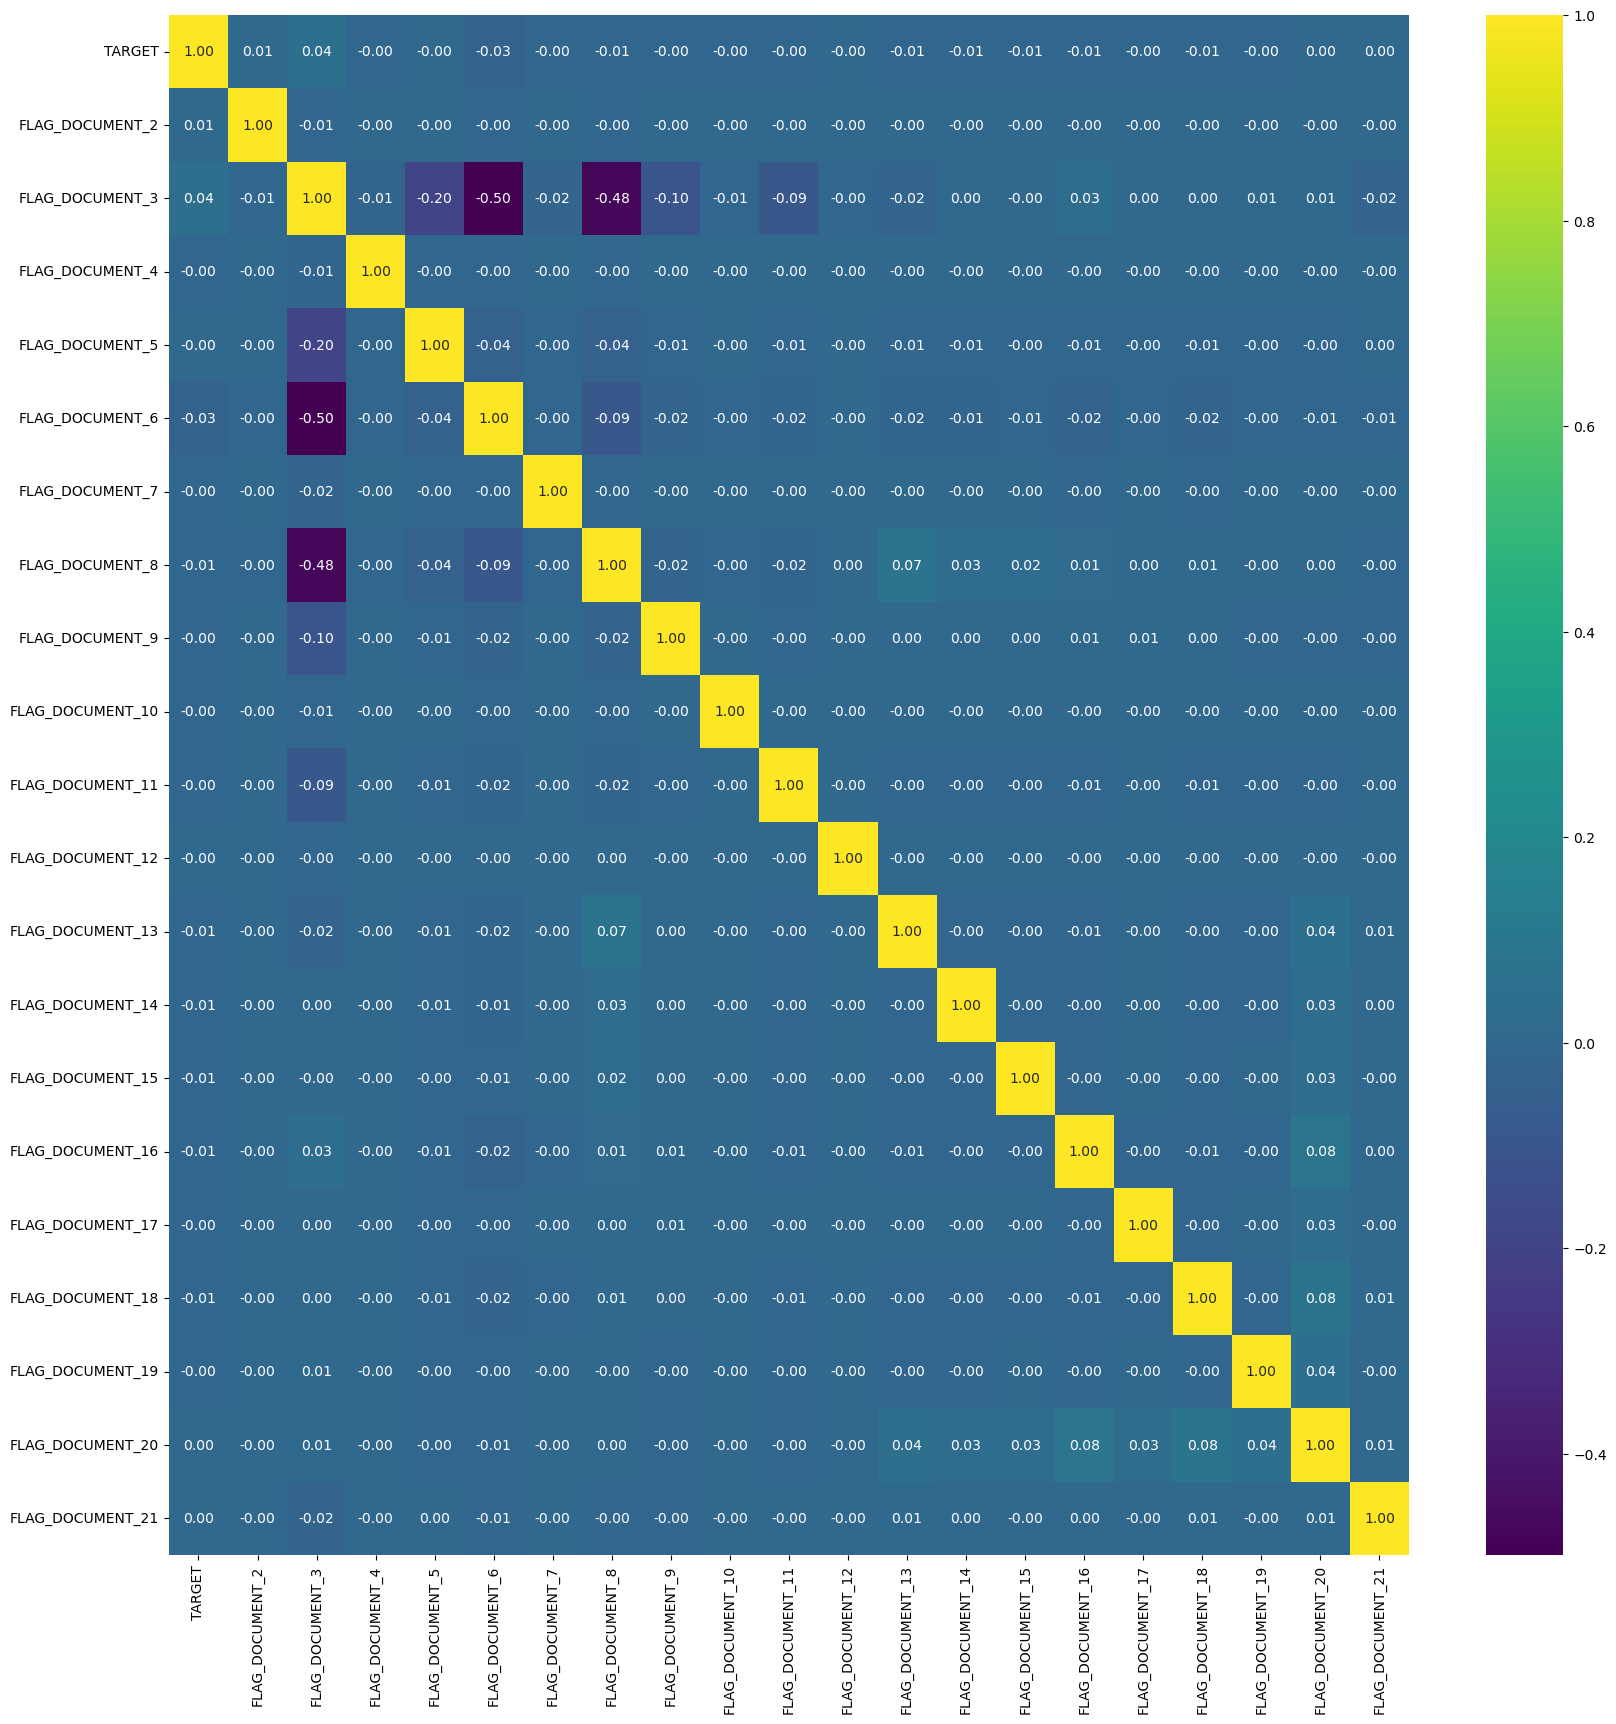

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(application[doc].corr(), cmap='viridis', annot=True, fmt='.2f')

Karena kolom-kolom ini hampir korelasi dengan targetnya hampir sama, maka untuk mengurangi dimensi data semua kolom FLAG_DOCUMENT di jumlahkan.

### Membuat kolom TOTAL_FLAG_DOC

In [37]:
application['TOTAL_FLAG_DOC'] = application[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']].sum(axis=1)

application = application.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])

In [38]:
application[['TOTAL_FLAG_DOC']].sample(5)

TOTAL_FLAG_DOC
308716               1
219748               2
268751               1
203746               1
179147               1

In [39]:
application[['TOTAL_FLAG_DOC']].describe().transpose()

count  mean  std  min  25%  50%  75%  max
TOTAL_FLAG_DOC 356255.00  0.94 0.32 0.00 1.00 1.00 1.00 4.00

## CEK KOLOM REDUNDAN

### kolom Bangunan Tempat Tinggal

In [40]:
application.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100001     NaN         Cash loans           F            N   
1      100005     NaN         Cash loans           M            N   
2      100013     NaN         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         135000.00   568800.00     20560.50   
1               Y             0          99000.00   222768.00     17370.00   
2               Y             0         202500.00   663264.00     69777.00   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        450000.00   Unaccompanied          Working   
1        180000.00   Unaccompanied          Working   
2        630000.00             NaN          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2               Higher education            Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02      -19241          -2329           -5170.00   
1                        0.04      -18064          -4469           -9118.00   
2                        0.02      -20038          -4458           -2175.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -812          NaN           1               1                0   
1            -1623          NaN           1               1                0   
2            -3503         5.00           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  \
0                 1           0           1                 NaN   
1                 1           0           0  Low-skill Laborers   
2                 1           0           0             Drivers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             2.00                     2                            2   
1             2.00                     2                            2   
2             2.00                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                       18   
1                     FRIDAY                        9   
2                     MONDAY                       14   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0       Kindergarten   
1                       0                        0      Self-employed   
2                       0                        0  Transport: type 3   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.75          0.79          0.16            0.07              0.06   
1          0.56          0.29          0.43             NaN               NaN   
2           NaN          0.70          0.61             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                         0.97              NaN             NaN   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0            NaN      

In [41]:
bangunan = ['TARGET', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI']
bangunan2 = ['TARGET', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI']
bangunan3 = ['TARGET', 'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI']

<Axes: >

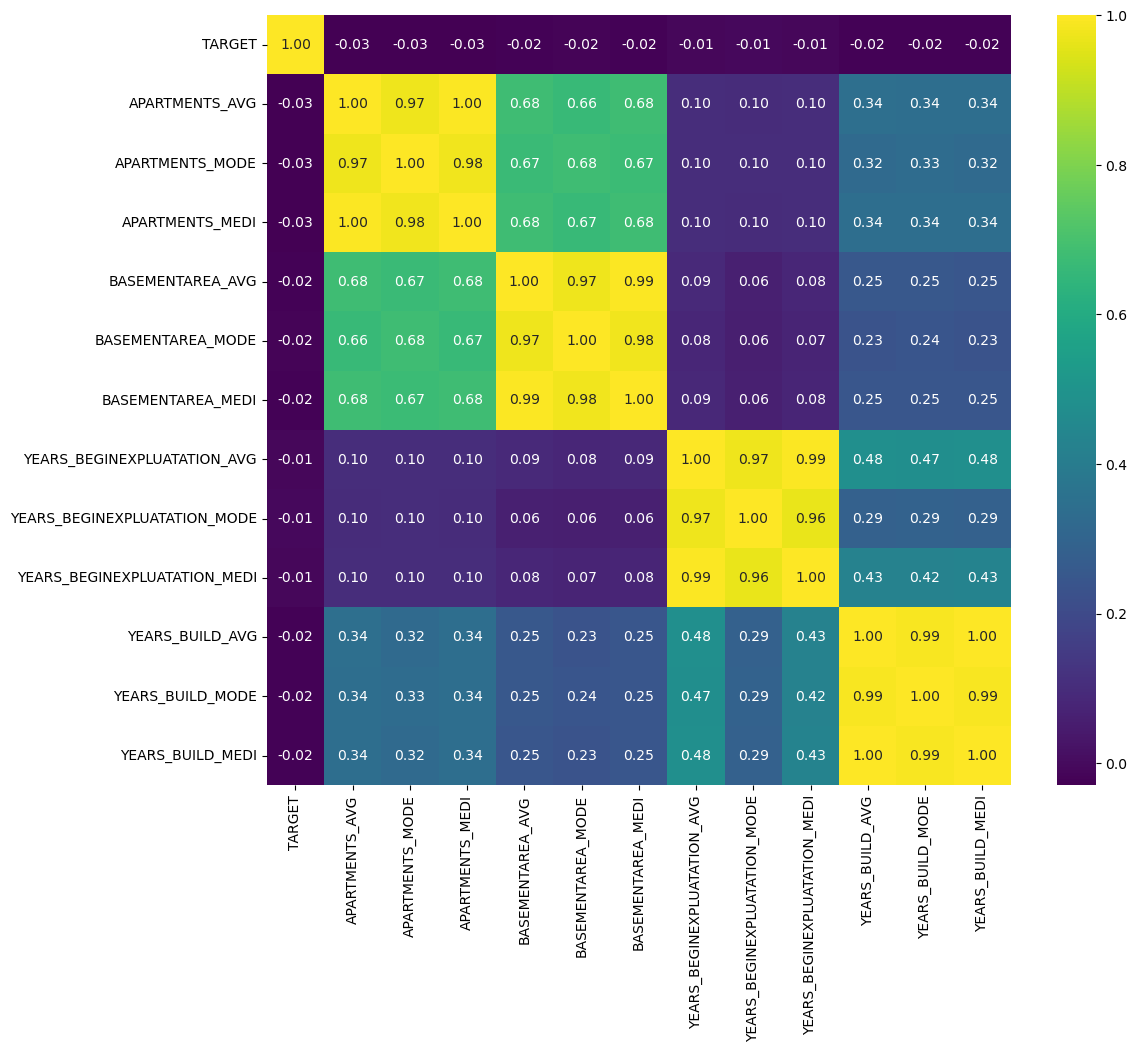

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(application[bangunan].corr(), cmap='viridis', annot=True, fmt='.2f')

<Axes: >

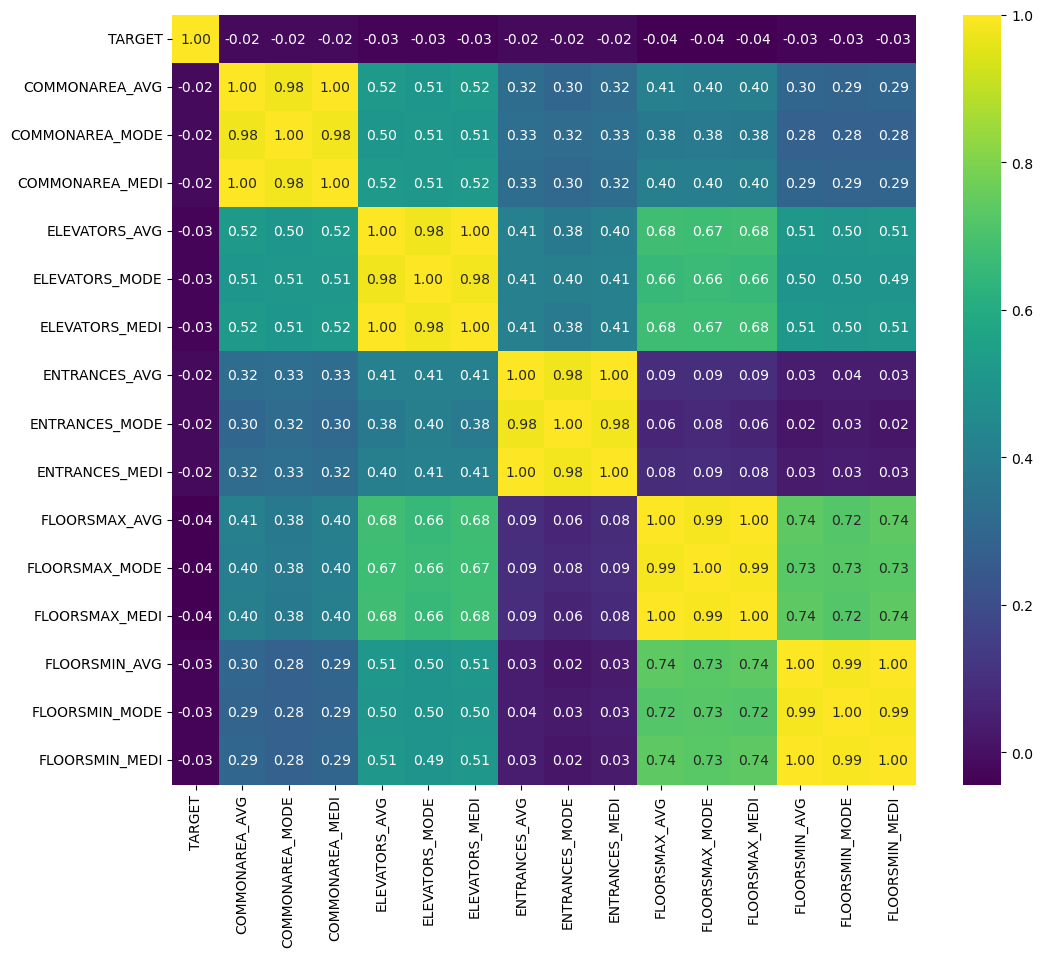

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(application[bangunan2].corr(), cmap='viridis', annot=True, fmt='.2f')

<Axes: >

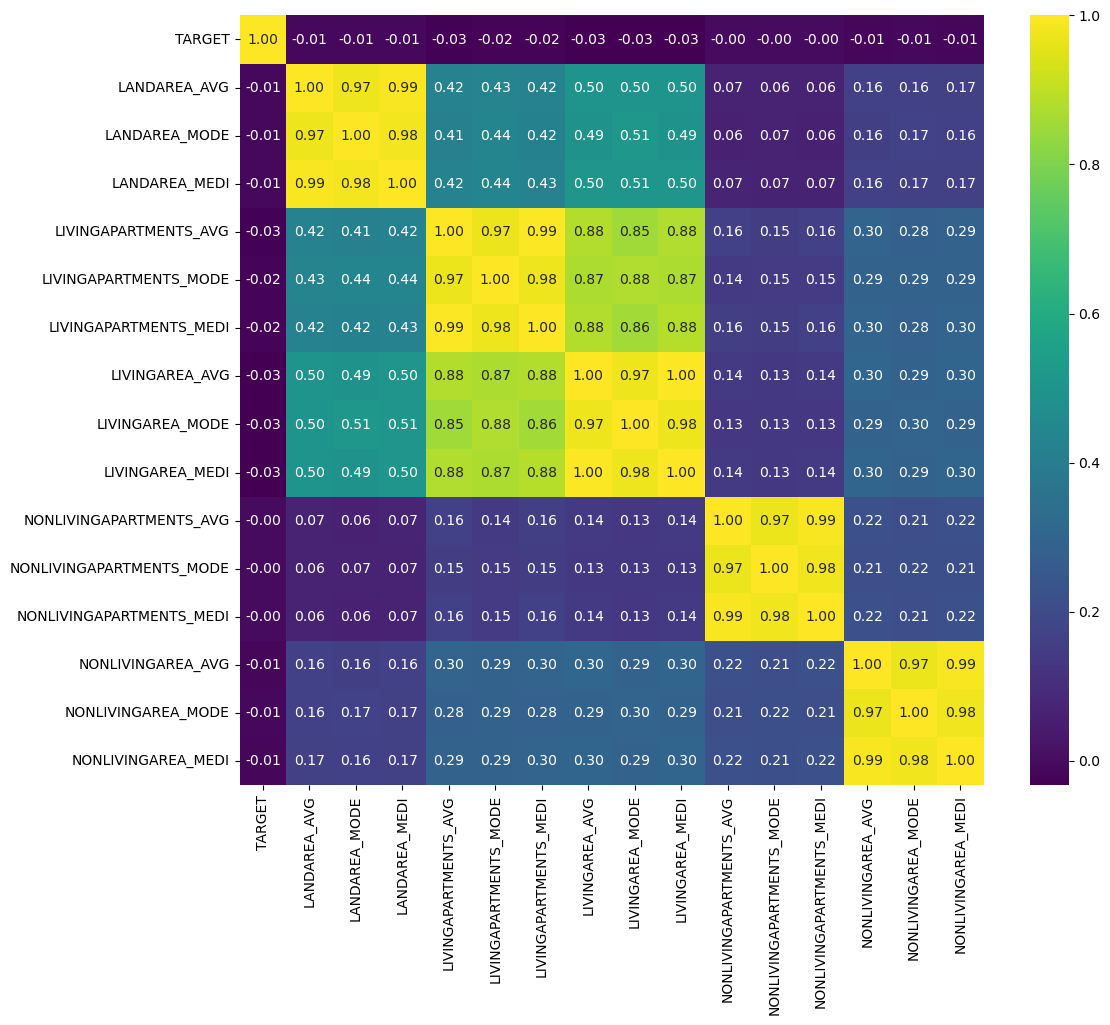

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(application[bangunan3].corr(), cmap='viridis', annot=True, fmt='.2f')

Hasil Explorasi <br>
Data AVG, MODE, dan MEDI redundan, maka 2 kolom akan dihapus dan 1 kolom akan di biarkan

### Kolom EXT_SOURCE_1

In [45]:
EXT_SOURCE = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'] 

<Axes: >

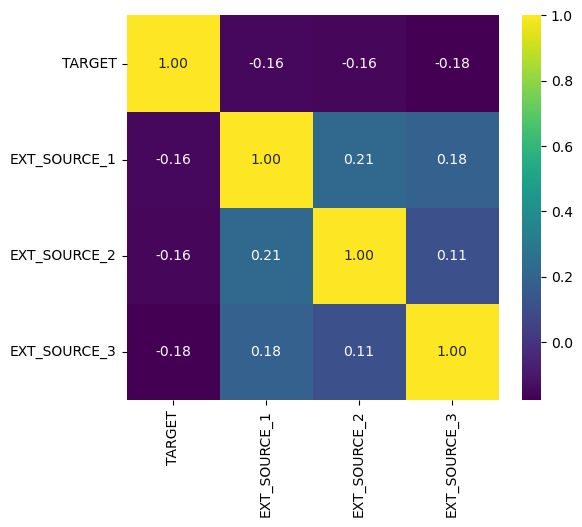

In [46]:
plt.figure(figsize=(6, 5))
sns.heatmap(application[EXT_SOURCE].corr(), cmap='viridis', annot=True, fmt='.2f')

### Kolom AMT_REQ

In [47]:
AMT_REQ = ['TARGET', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

<Axes: >

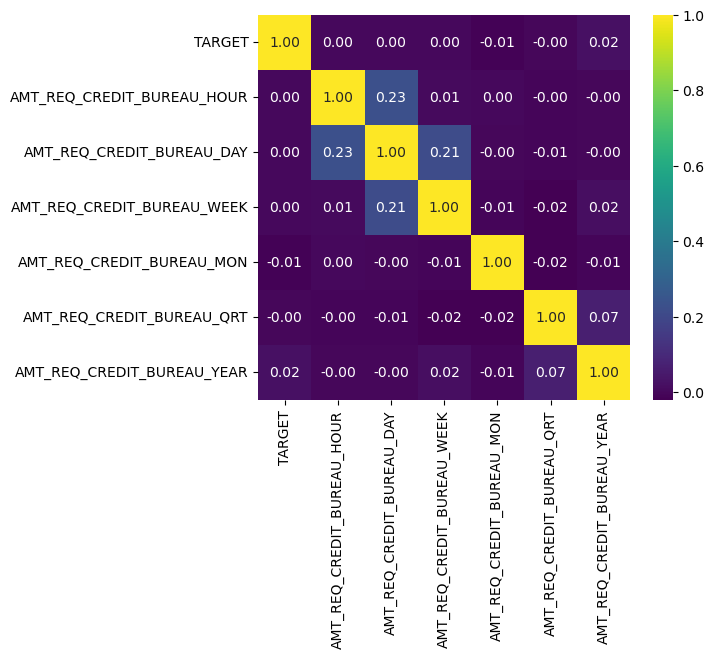

In [48]:
plt.figure(figsize=(6, 5))
sns.heatmap(application[AMT_REQ].corr(), cmap='viridis', annot=True, fmt='.2f')

### Menghapus Kolom Redundan

In [49]:
kolom_dihapus = ['APARTMENTS_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI']
kolom_dihapus2 = ['COMMONAREA_MODE', 'COMMONAREA_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',  'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI']
kolom_dihapus3 = ['LANDAREA_MODE', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI']

In [50]:
application.drop(columns=kolom_dihapus, inplace=True)
application.drop(columns=kolom_dihapus2, inplace=True)
application.drop(columns=kolom_dihapus3, inplace=True)

In [51]:
application.describe().transpose()

count      mean       std       min       25%  \
SK_ID_CURR                  356255.00 278128.00 102842.10 100001.00 189064.50   
TARGET                      307511.00      0.08      0.27      0.00      0.00   
CNT_CHILDREN                356255.00      0.41      0.72      0.00      0.00   
AMT_INCOME_TOTAL            356255.00 170116.06 223506.82  25650.00 112500.00   
AMT_CREDIT                  356255.00 587767.41 398623.69  45000.00 270000.00   
AMT_ANNUITY                 356219.00  27425.56  14732.81   1615.50  16731.00   
AMT_GOODS_PRICE             355977.00 528020.00 366064.99  40500.00 234000.00   
REGION_POPULATION_RELATIVE  356255.00      0.02      0.01      0.00      0.01   
DAYS_BIRTH                  356255.00 -16041.25   4358.80 -25229.00 -19676.00   
DAYS_EMPLOYED               356255.00  64317.23 141705.53 -17912.00  -2781.00   
DAYS_REGISTRATION           356255.00  -4983.59   3526.97 -24672.00  -7477.00   
DAYS_ID_PUBLISH             356255.00  -3002.07   1517.90  -7197.00  -4318.00   
OWN_CAR_AGE                 121014.00     12.02     11.88      0.00      5.00   
FLAG_MOBIL                  356255.00      1.00      0.00      0.00      1.00   
FLAG_EMP_PHONE              356255.00      0.82      0.39      0.00      1.00   
FLAG_WORK_PHONE             356255.00      0.20      0.40      0.00      0.00   
FLAG_CONT_MOBILE            356255.00      1.00      0.04      0.00      1.00   
FLAG_PHONE                  356255.00      0.28      0.45      0.00      0.00   
FLAG_EMAIL                  356255.00      0.07      0.26      0.00      0.00   
CNT_FAM_MEMBERS             356253.00      2.15      0.91      1.00      2.00   
REGION_RATING_CLIENT        356255.00      2.05      0.51      1.00      2.00   
REGION_RATING_CLIENT_W_CITY 356255.00      2.03      0.50     -1.00      2.00   
HOUR_APPR_PROCESS_START     356255.00     12.06      3.27      0.00     10.00   
REG_REGION_NOT_LIVE_REGION  356255.00      0.02      0.12      0.00      0.00   
REG_REGION_NOT_WORK_REGION  356255.00      0.05      0.22      0.00      0.00   
LIVE_REGION_NOT_WORK_REGION 356255.00      0.04      0.20      0.00      0.00   
REG_CITY_NOT_LIVE_CITY      356255.00      0.08      0.27      0.00      0.00   
REG_CITY_NOT_WORK_CITY      356255.00      0.23      0.42      0.00      0.00   
LIVE_CITY_NOT_WORK_CITY     356255.00      0.18      0.38      0.00      0.00   
EXT_SOURCE_1                162345.00      0.50      0.21      0.01      0.34   
EXT_SOURCE_2                355587.00      0.51      0.19      0.00      0.39   
EXT_SOURCE_3                286622.00      0.51      0.19      0.00      0.37   
APARTMENTS_AVG              176307.00      0.12      0.11      0.00      0.06   
BASEMENTAREA_AVG            148671.00      0.09      0.08      0.00      0.04   
YEARS_BEGINEXPLUATATION_AVG 183392.00      0.98      0.06      0.00      0.98   
YEARS_BUILD_AVG             119949.00      0.75      0.11      0.00      0.69   
COMMONAREA_AVG              107895.00      0.05      0.08      0.00      0.01   
ELEVATORS_AVG               167175.00      0.08      0.14      0.00      0.00   
ENTRANCES_AVG               177848.00      0.15      0.10      0.00      0.07   
FLOORSMAX_AVG               179914.00      0.23      0.15      0.00      0.17   
FLOORSMIN_AVG               115147.00      0.23      0.16      0.00      0.08   
LANDAREA_AVG                145411.00      0.07      0.08      0.00      0.02   
LIVINGAPARTMENTS_AVG        113276.00      0.10      0.09      0.00      0.05   
LIVINGAREA_AVG              178353.00      0.11      0.11      0.00      0.05   
NONLIVINGAPARTMENTS_AVG     109394.00      0.01      0.05      0.00      0.00   
NONLIVINGAREA_AVG           160489.00      0.03      0.07      0.00      0.00   
TOTALAREA_MODE              185200.00      0.10      0.11      0.00      0.04   
OBS_30_CNT_SOCIAL_CIRCLE    355205.00      1.43      2.60      0.00      0.00   
DEF_30_CNT_SOCIAL_CIRCLE    355205.00      0.14      0.46      

In [52]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356219 non-null  float64
 10  AMT_GOODS_PRICE              355977 non-null  float64
 11  NAME_TYPE_SUITE              354052 non-null  object 
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

## CEK KOLOM REDUNDAN LANJUTAN 

In [53]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = application.select_dtypes(include=['number']).columns
kolom_kategorikal = application.select_dtypes(include=['object']).columns

<Axes: >

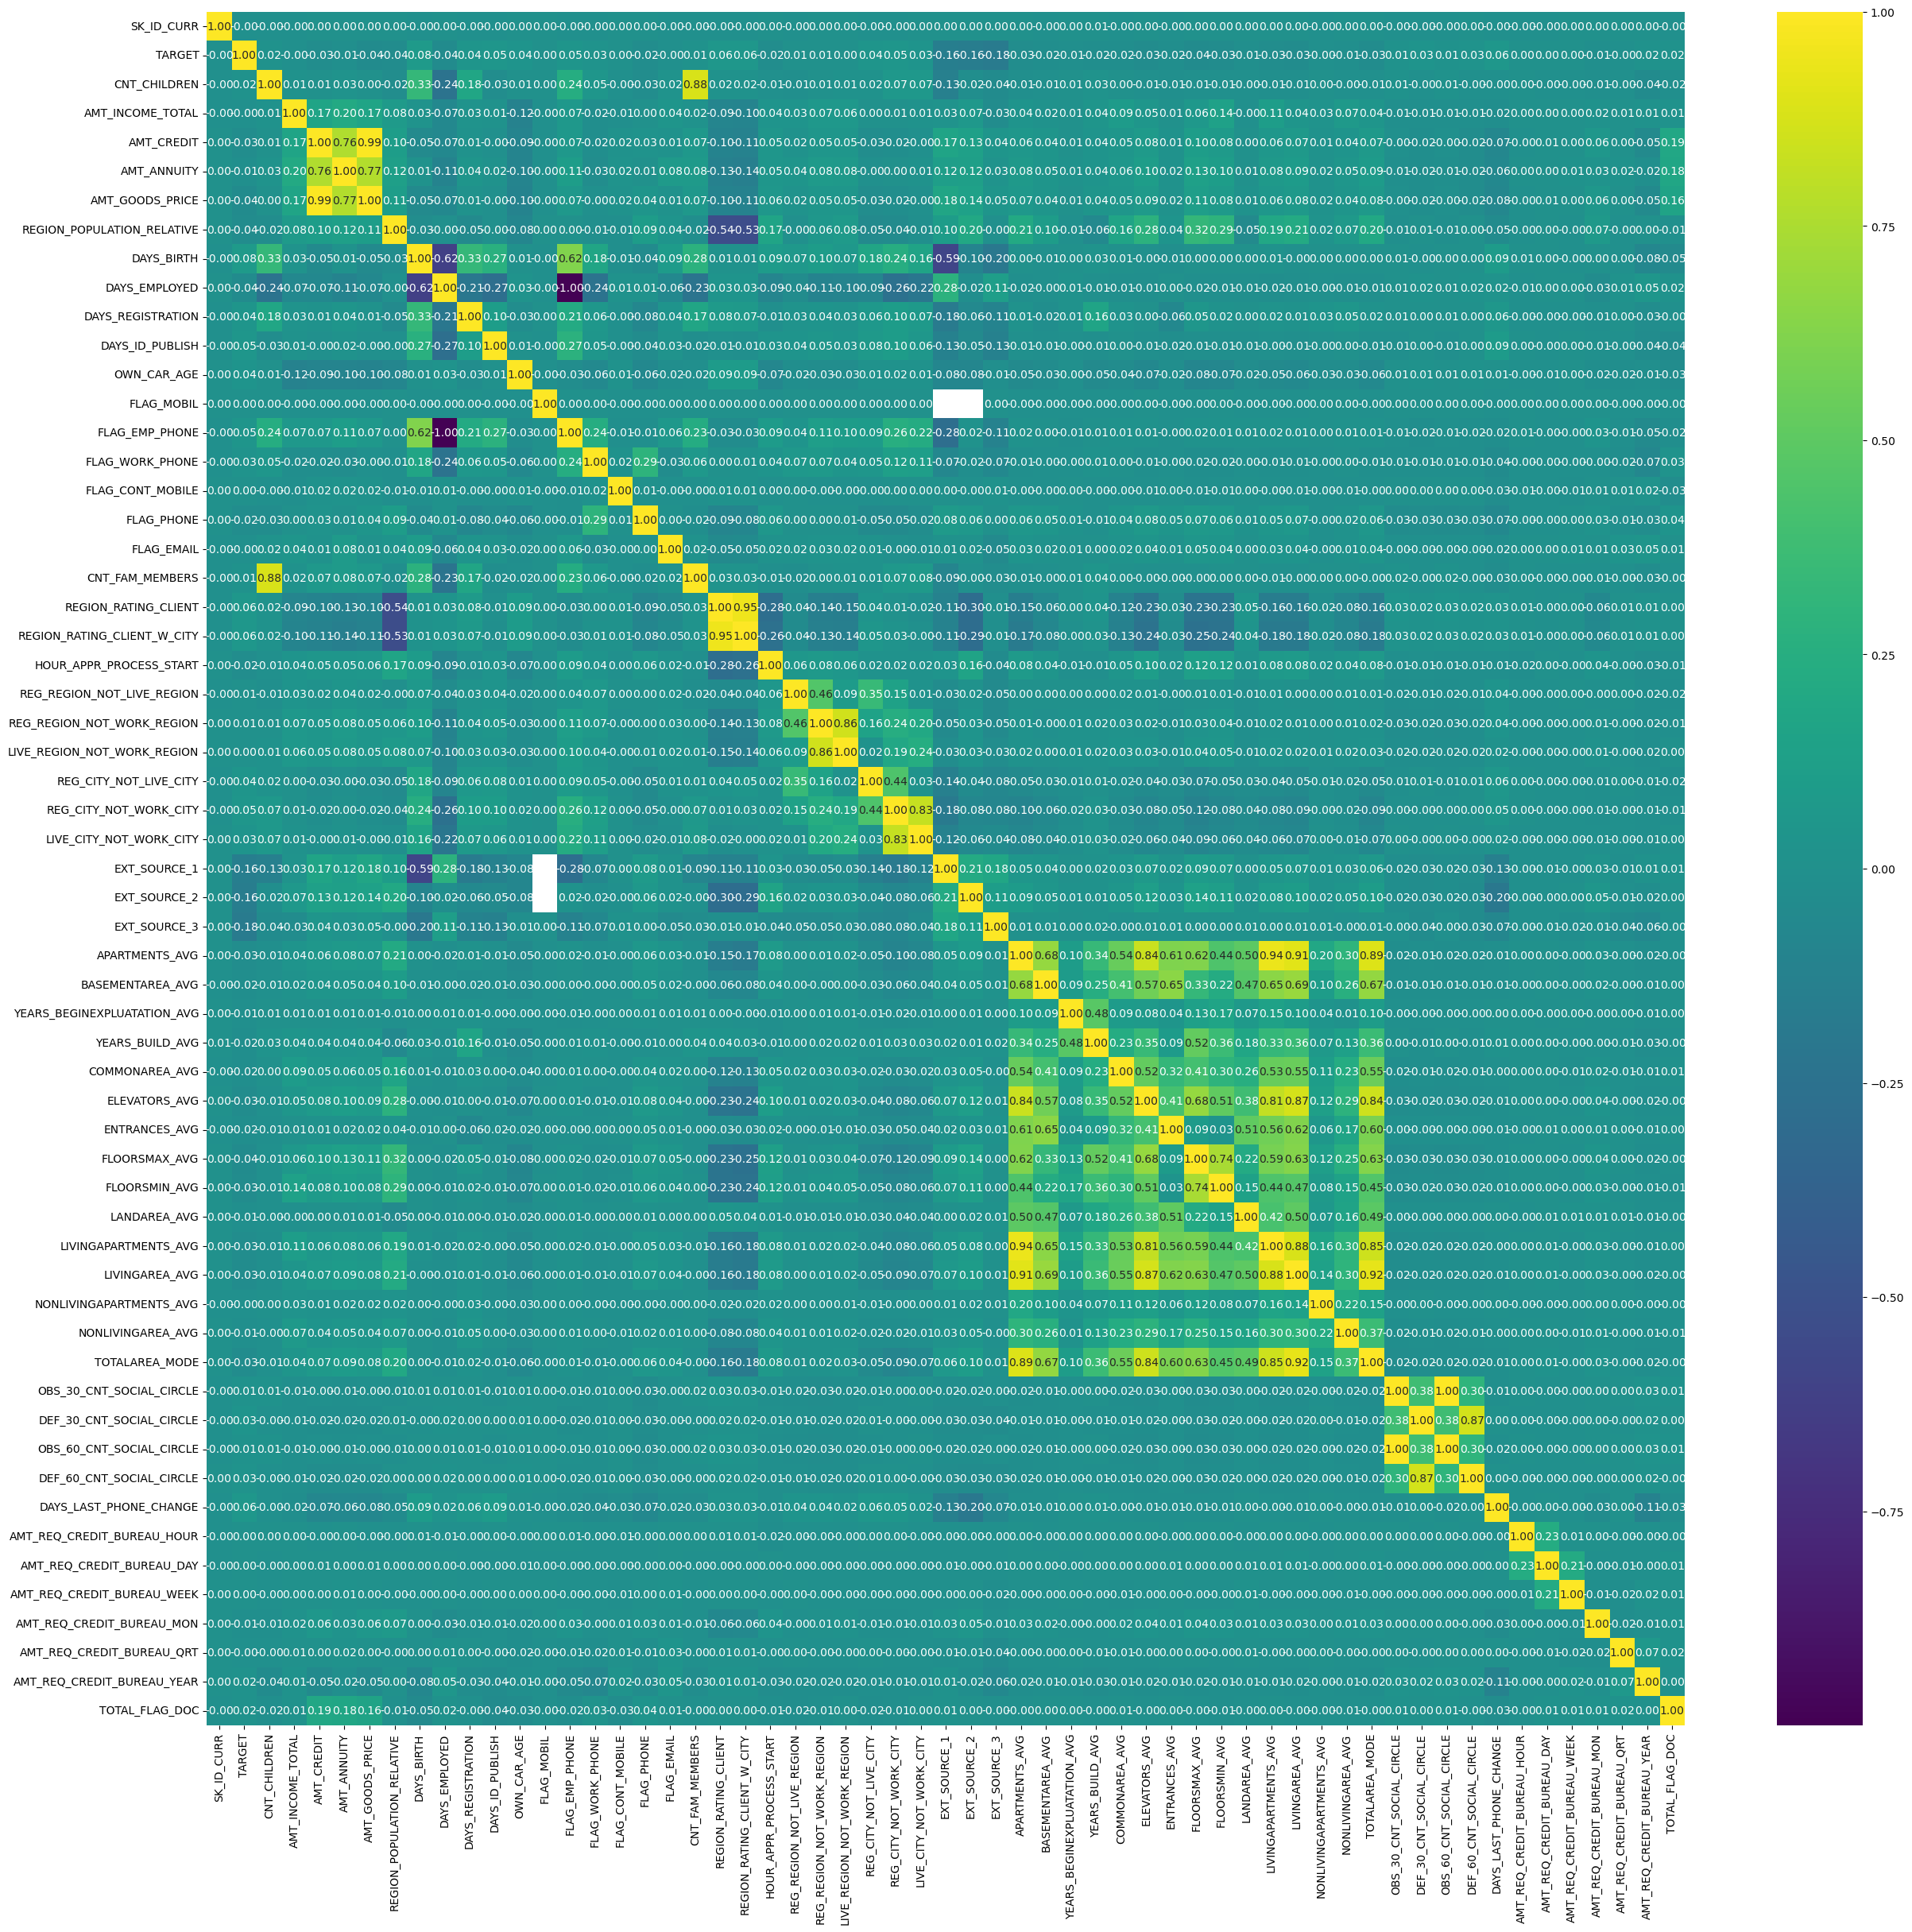

In [54]:
plt.figure(figsize=(30, 28))
sns.heatmap(application[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

LIVE_REGION_NOT_WORK_REGIONKOLOM REDUNDAN
- AMT_CREDIT dan AMT_GOODS_PRISE 0.99
- OBS_30_CNT_SOCIAL_CIRCLE dan OBS_60_CNT_SOCIAL_CIRCLE 1.00
- CNT_FAM_Member dan CNT_Children 0.88
- REGION_RATING_CLIENT dan REGION_RATING_CLIENT_W_CITY 0.95
- REG_CITY_NOT_WORK_CITY dan LIVE_CITY_NOT_WORK_CITY 0.83
- REG_REGION_NOT_WORK_REGION dan LIVE_REGION_NOT_WORK_REGION 0.86
- APARTMENT_AVG dan LIVINGAPARTMENT_AVG, dan LIVINGAREA_AVG dan TOTALAREA_MODE
- DEF_30_CNT_SOCIAL_CIRCLE dan DEF_60_CNT_SOCIAL_CIRCLE 0.87

### Menghapus Kolom Redundan

In [55]:
kolom_dihapus = ['AMT_GOODS_PRICE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'TOTALAREA_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [56]:
application.drop(columns=kolom_dihapus, inplace=True)

## CEK KOLOM KATEGORIKAL

In [57]:
application[kolom_kategorikal].describe().transpose()

count unique                            top  \
NAME_CONTRACT_TYPE          356255      2                     Cash loans   
CODE_GENDER                 356255      3                              F   
FLAG_OWN_CAR                356255      2                              N   
FLAG_OWN_REALTY             356255      2                              Y   
NAME_TYPE_SUITE             354052      7                  Unaccompanied   
NAME_INCOME_TYPE            356255      8                        Working   
NAME_EDUCATION_TYPE         356255      5  Secondary / secondary special   
NAME_FAMILY_STATUS          356255      6                        Married   
NAME_HOUSING_TYPE           356255      6              House / apartment   
OCCUPATION_TYPE             244259     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  356255      7                        TUESDAY   
ORGANIZATION_TYPE           356255     58         Business Entity Type 3   
FONDKAPREMONT_MODE          113163      4               reg oper account   
HOUSETYPE_MODE              178339      3                 block of flats   
WALLSMATERIAL_MODE          176021      7                          Panel   
EMERGENCYSTATE_MODE         188291      2                             No   

                              freq  
NAME_CONTRACT_TYPE          326537  
CODE_GENDER                 235126  
FLAG_OWN_CAR                235235  
FLAG_OWN_REALTY             246970  
NAME_TYPE_SUITE             288253  
NAME_INCOME_TYPE            183307  
NAME_EDUCATION_TYPE         252379  
NAME_FAMILY_STATUS          228715  
NAME_HOUSING_TYPE           316513  
OCCUPATION_TYPE              63841  
WEEKDAY_APPR_PROCESS_START   63652  
ORGANIZATION_TYPE            78832  
FONDKAPREMONT_MODE           85954  
HOUSETYPE_MODE              175162  
WALLSMATERIAL_MODE           77309  
EMERGENCYSTATE_MODE         185607

In [58]:
for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(application[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         326537
Revolving loans     29718
Name: count, dtype: int64

Value count kolom CODE_GENDER:
CODE_GENDER
F      235126
M      121125
XNA         4
Name: count, dtype: int64

Value count kolom FLAG_OWN_CAR:
FLAG_OWN_CAR
N    235235
Y    121020
Name: count, dtype: int64

Value count kolom FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    246970
N    109285
Name: count, dtype: int64

Value count kolom NAME_TYPE_SUITE:
NAME_TYPE_SUITE
Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
Name: count, dtype: int64

Value count kolom NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 183307
Commercial associate     83019
Pensioner                64635
State servant            25235
Unemployed                  23
Student                     20
Businessman                 11
Maternity leave         

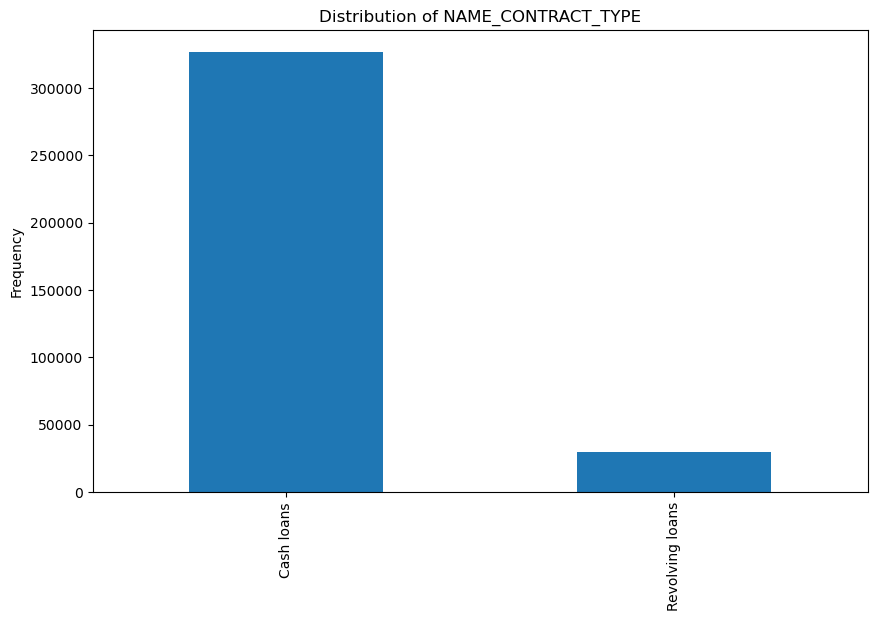

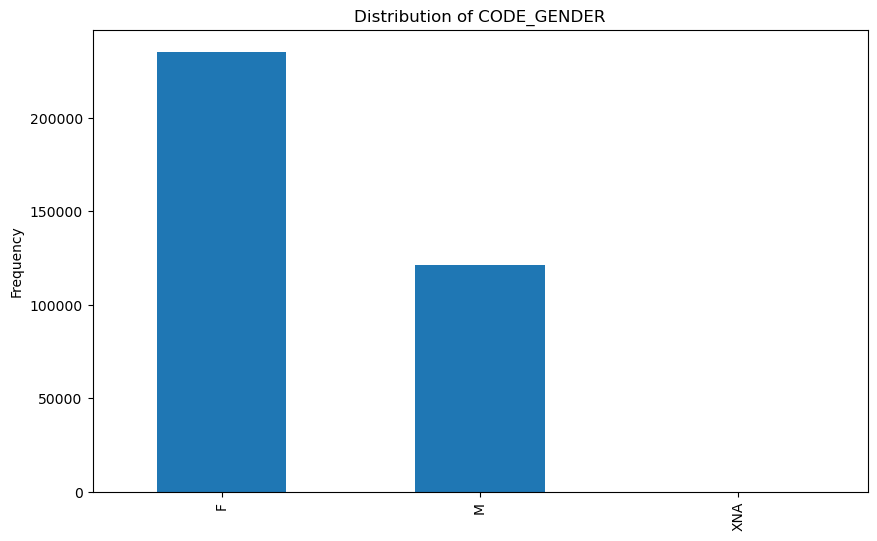

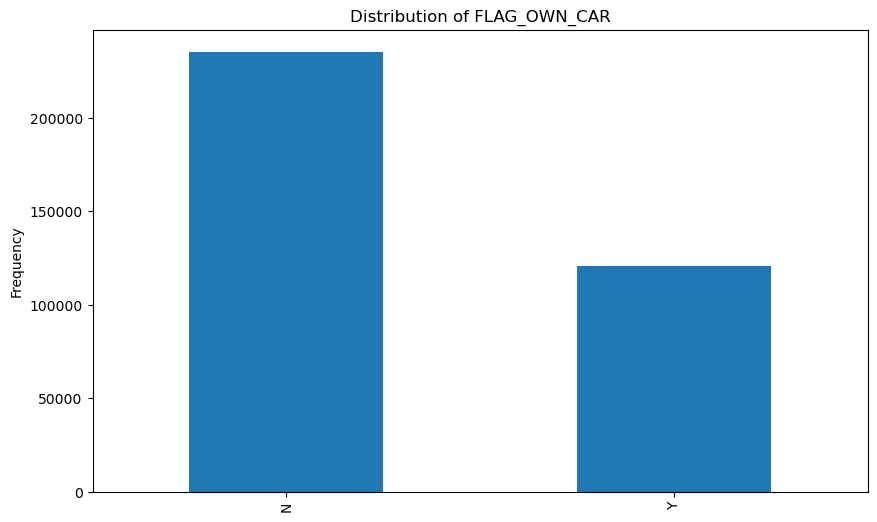

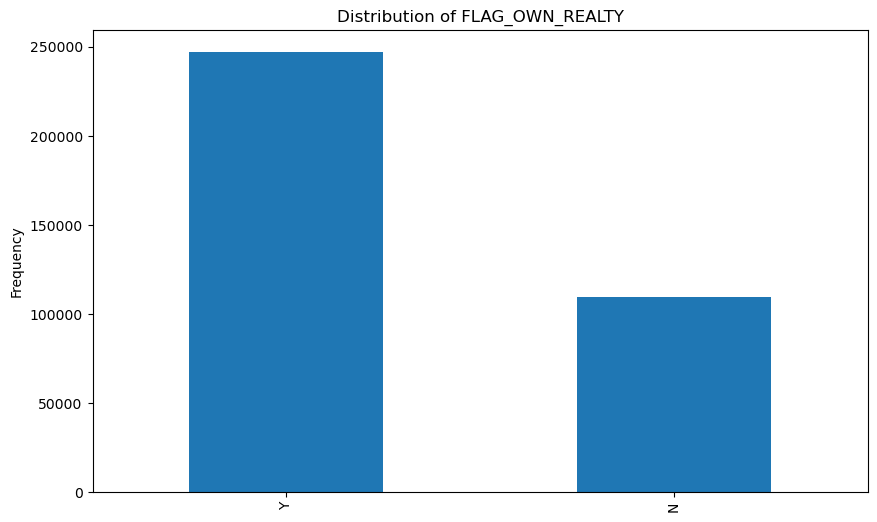

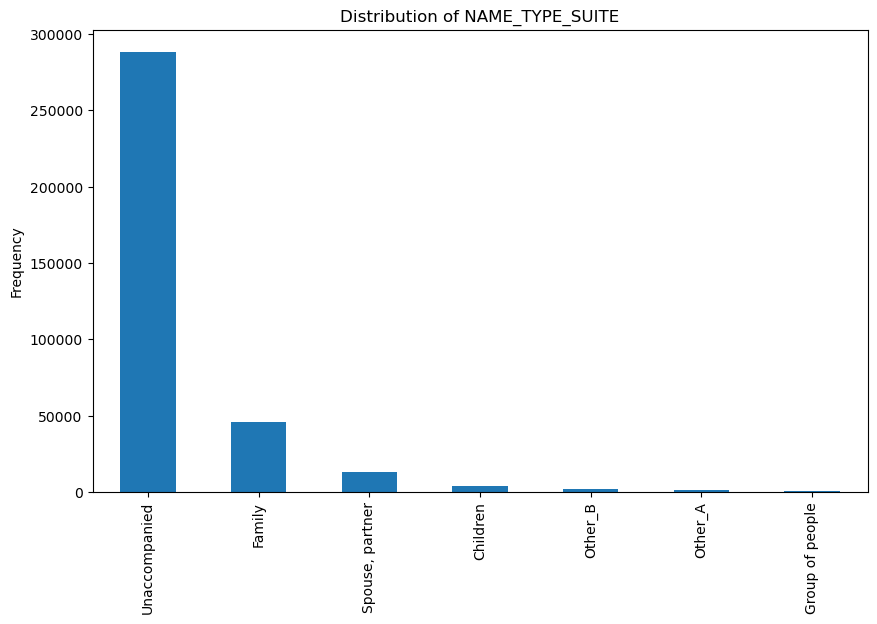

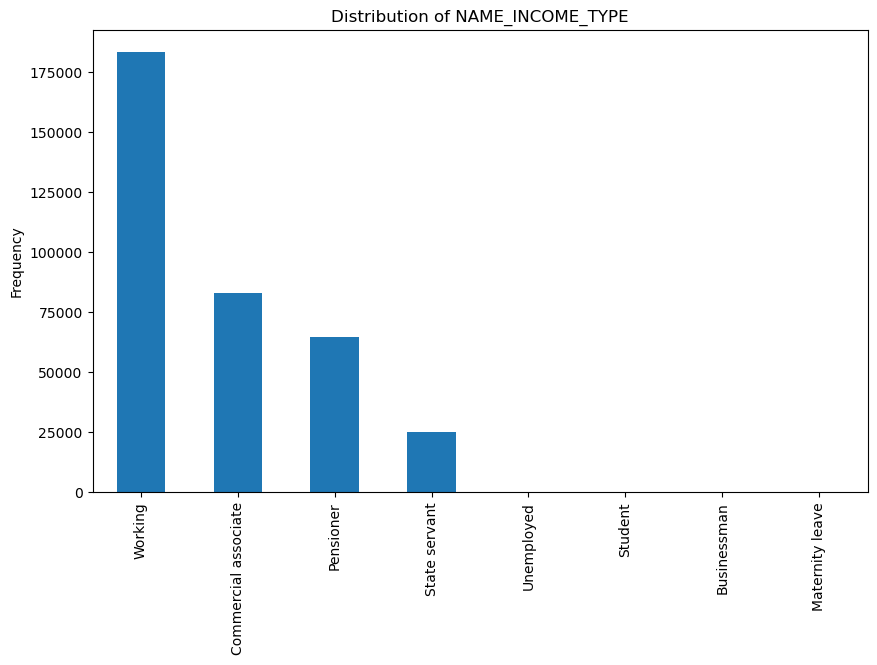

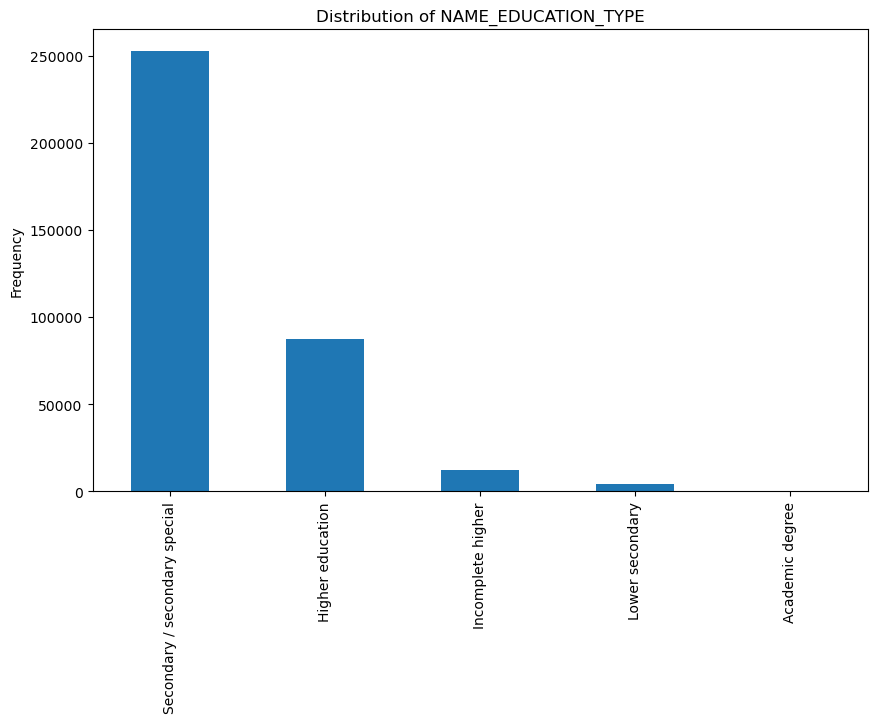

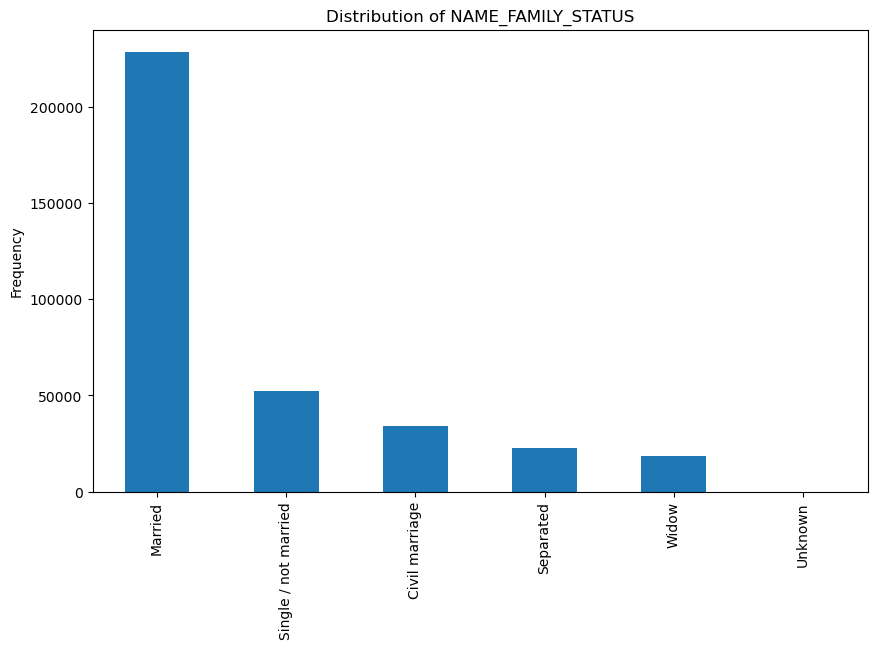

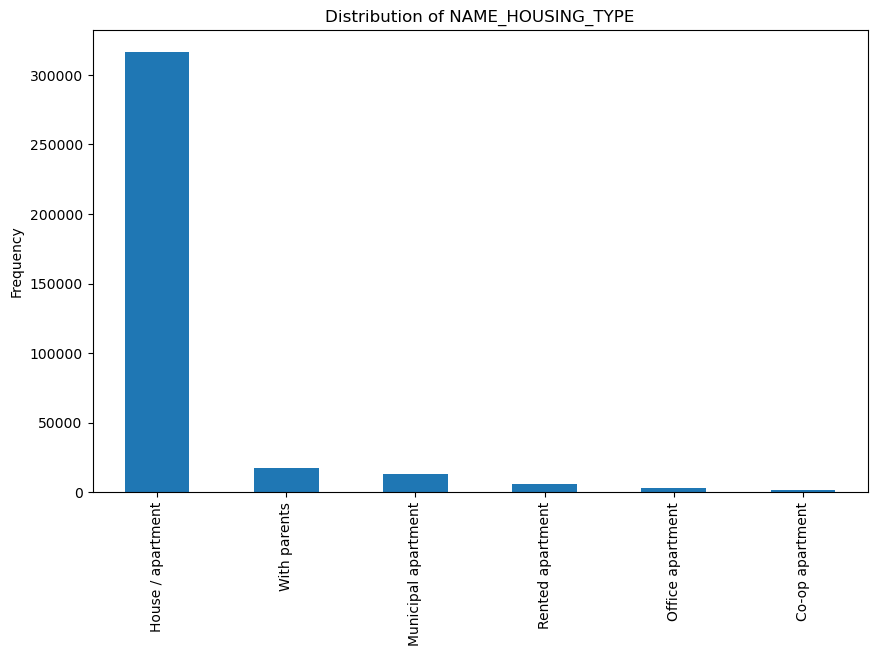

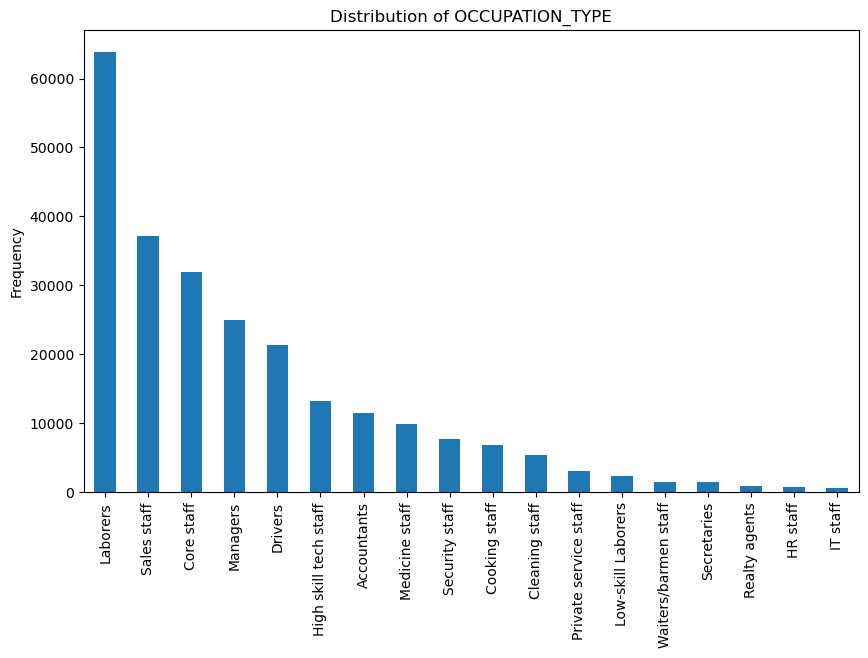

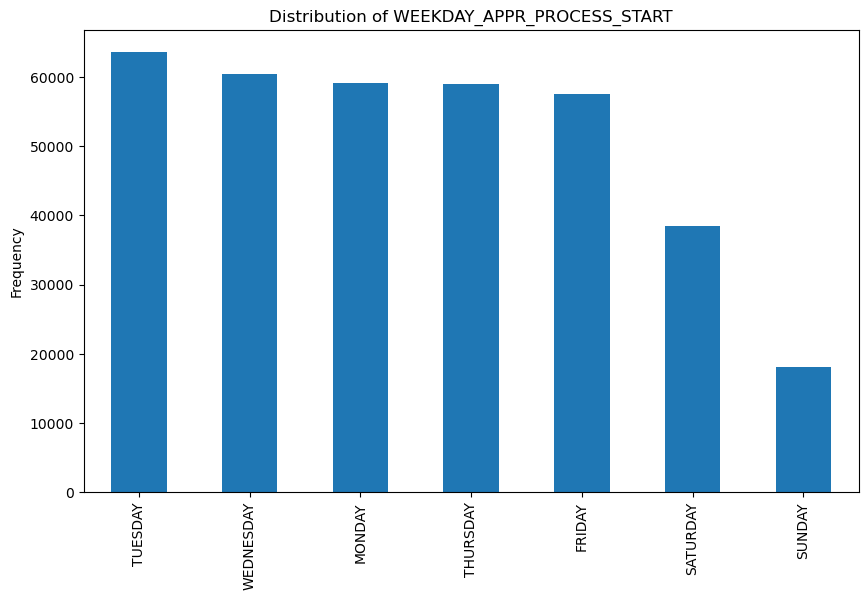

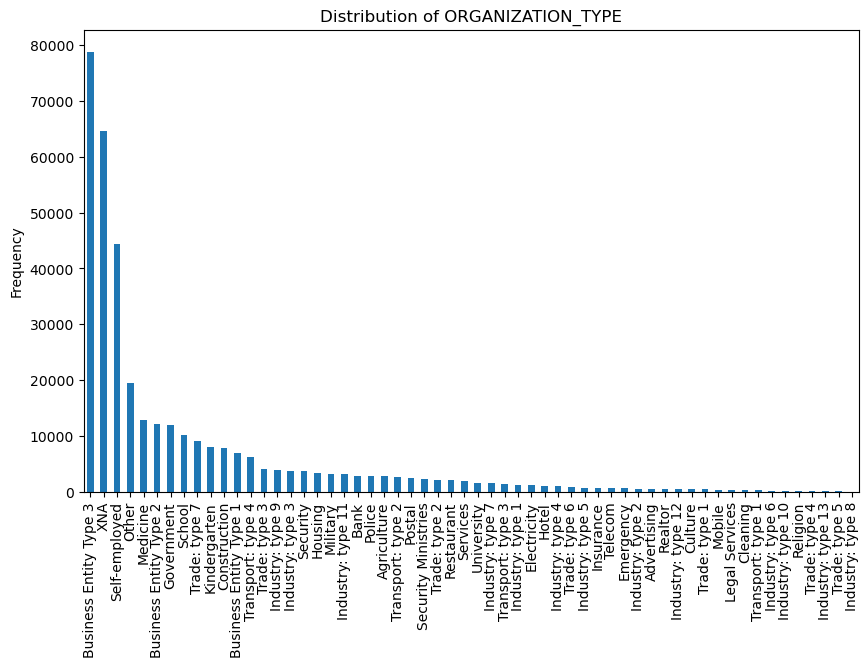

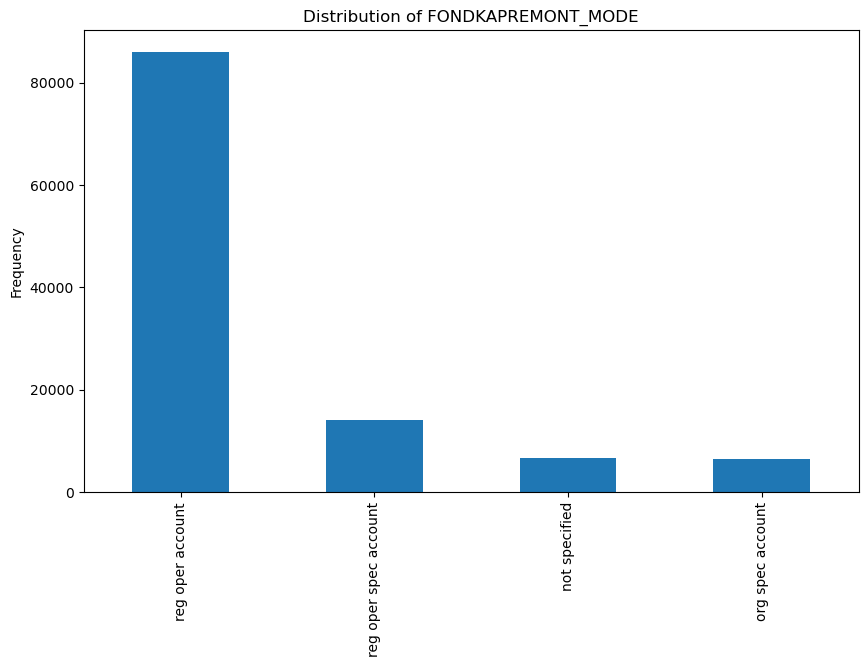

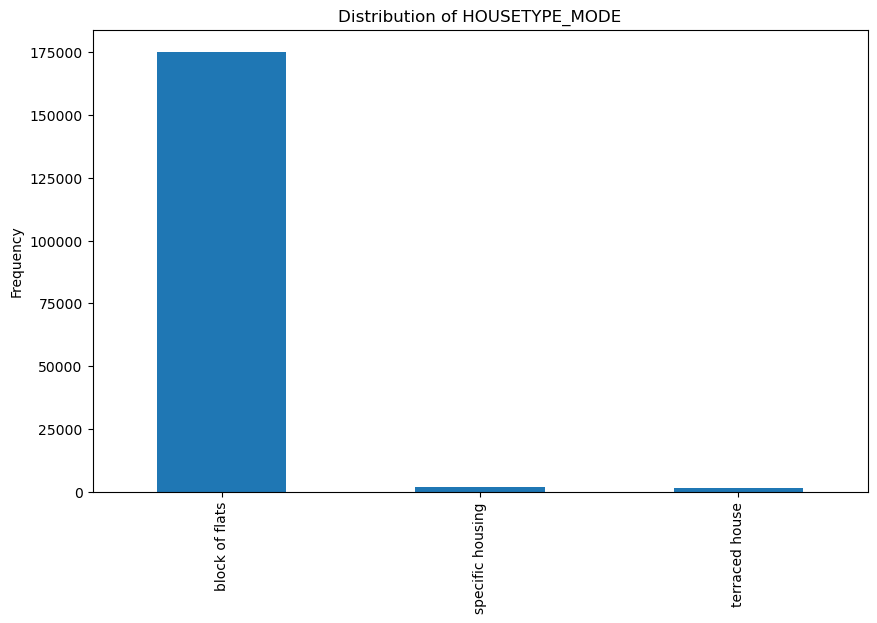

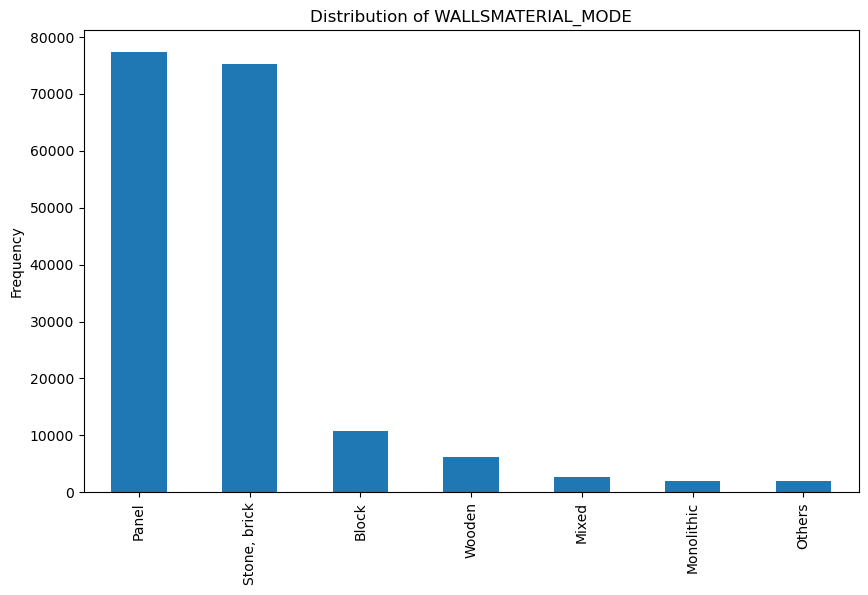

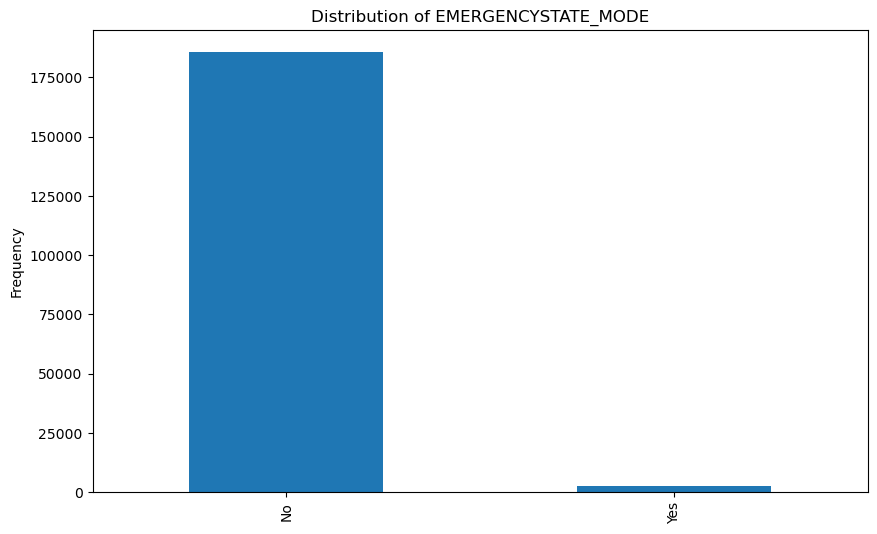

In [59]:
kolom_kategorikal = application.select_dtypes(include=['object']).columns

# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(kolom_kategorikal):
    plt.figure(figsize=(10, 6))
    application[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.show()

Hasil yang didapat :<br>
Saya memutuskan bahwa kolom HOUSETYPE_MODE dan EMERGENCYSTATE_MODE akan di hapus karena nilai di dominasi (hampir 100%) oleh satu nilai

In [60]:
kolom_dihapus4 = ['HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']

application.drop(columns=kolom_dihapus4, inplace=True)

## CEK MISSING VALUES

In [61]:
# Jumlah data sebelum Handle Missing Values
print('Jumlah data sebelum menangani Missing Values adalah ', len(application))

Jumlah data sebelum menangani Missing Values adalah  356255


### Cek Nilai Null

In [62]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = application.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(application)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                             Jumlah Missing Values  \
TARGET                                       48744   
AMT_ANNUITY                                     36   
NAME_TYPE_SUITE                               2203   
OWN_CAR_AGE                                 235241   
OCCUPATION_TYPE                             111996   
CNT_FAM_MEMBERS                                  2   
EXT_SOURCE_1                                193910   
EXT_SOURCE_2                                   668   
EXT_SOURCE_3                                 69633   
APARTMENTS_AVG                              179948   
BASEMENTAREA_AVG                            207584   
YEARS_BEGINEXPLUATATION_AVG                 172863   
YEARS_BUILD_AVG                             236306   
COMMONAREA_AVG                              248360   
ELEVATORS_AVG                               189080   
ENTRANCES_AVG                               178407   
FLOORSMAX_AVG                               176341   
FLOORSMIN_AVG               

Kolom dengan jumlah Missing Values lebih dari 40% akan di hapus<br>
1. OWN_CAR_AGE 66.03% dan hampir tidak memiliki korelasi dengan Target
2. EXT_SOURCE_1 54.43% dan hampir tidak memiliki korelasi dengan Target
3. dari kolom APARTMENTS_AVG hingga WALLSMATERIAL_MODE memiliki Missing Values lebih dari 49%, dan hampir tidak memiliki korelasi dengan Target

kolom yang tidak di hapus tetapi memiliki nilai Missing Values yang besar<br>
1. OCCUPATION_TYPE

In [63]:
kolom_dihapus5 = ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 
                  'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                  'NONLIVINGAREA_AVG', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']

application.drop(columns=kolom_dihapus5, inplace=True)

In [64]:
# Nilai Missing Values pada OCCUPATION_TYPE di isi dnegan Unknown karena terlalu banyak
application['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

### Hapus Baris yang nilai Missing Valuesnya < 10%

In [65]:
threshold = 0.1  # 10%
columns_with_few_missing = application.columns[application.isnull().mean() < threshold]

# Hapus baris yang memiliki nilai null di kolom tersebut
application = application.dropna(subset=columns_with_few_missing)

### Identifikasi Distribusi

In [66]:
kolom_numerikal = application.select_dtypes(include=['number']).columns

C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\586802247.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application[kolom_numerikal[i]], color='gray')
C:\Users\sanny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\586802247.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level func

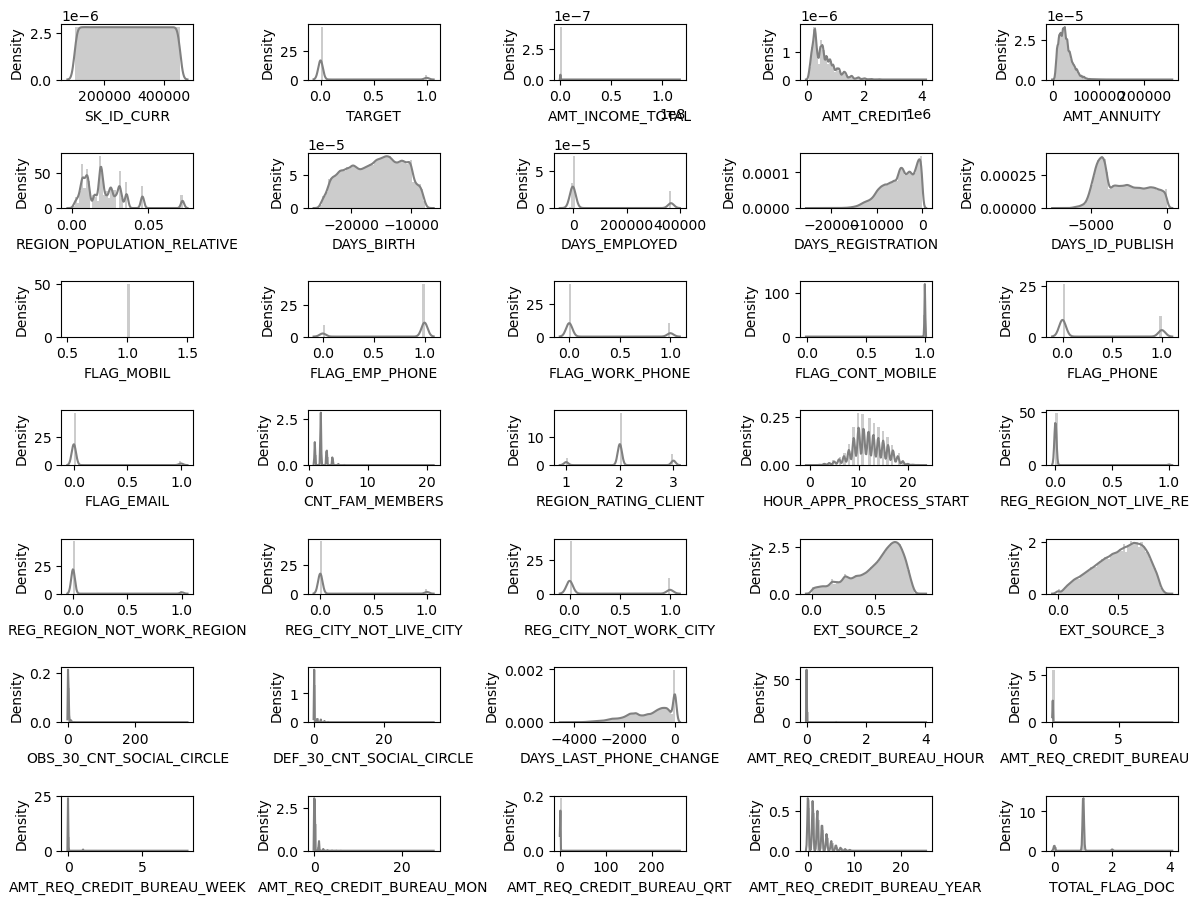

In [67]:
plt.figure(figsize=(12, 10))
for i in range(0, len(kolom_numerikal)):
    plt.subplot(8, 5, i+1)
    sns.distplot(application[kolom_numerikal[i]], color='gray')
    plt.tight_layout()

### Mengganti nilai Null kolom numerikal

In [68]:
# Pilih kolom numerik kecuali kolom 'TARGET'
numeric_columns = application.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_exclude_target = numeric_columns.drop('TARGET')

# Ganti nilai Null pada kolom numerik (kecuali TARGET) dengan median
application[numeric_columns_exclude_target] = application[numeric_columns_exclude_target].apply(lambda col: col.fillna(col.median()))

### Cek Nilai Null kembali

In [69]:
application.isna().sum()

SK_ID_CURR                        0
TARGET                        47772
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT        

In [70]:
# Jumlah data sebelum Handle Missing Values
print('Jumlah data sebelum menangani Missing Values adalah ', len(application))

Jumlah data sebelum menangani Missing Values adalah  352303


## CEK OUTLIERS

C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1492270944.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Loca

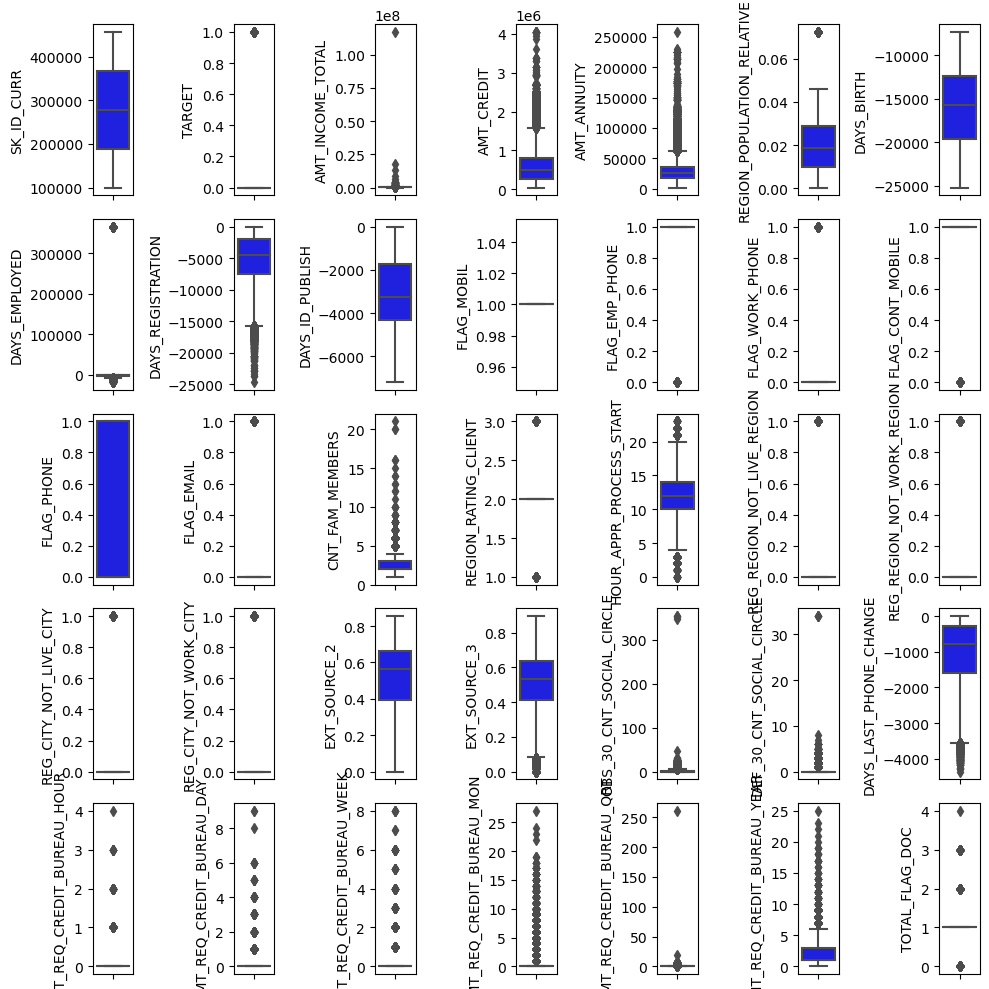

In [71]:
kolom_numerikal = application.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 10))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(5, 7, i+1)
    sns.boxplot(y=application[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

Menghapus Outliers akan menyebabkan kehilangan data yang sangat besar.  
Maka penanganan Outliers sebaiknya menggunakan Log Transformation.

In [72]:
application.describe().transpose()

count      mean       std       min       25%  \
SK_ID_CURR                 352303.00 278117.29 102835.66 100001.00 189057.50   
TARGET                     304531.00      0.08      0.27      0.00      0.00   
AMT_INCOME_TOTAL           352303.00 169980.43 224326.59  25650.00 112500.00   
AMT_CREDIT                 352303.00 588349.78 398357.25  45000.00 270000.00   
AMT_ANNUITY                352303.00  27456.70  14717.25   1615.50  16803.00   
REGION_POPULATION_RELATIVE 352303.00      0.02      0.01      0.00      0.01   
DAYS_BIRTH                 352303.00 -16043.08   4356.59 -25229.00 -19674.00   
DAYS_EMPLOYED              352303.00  64282.84 141678.62 -17912.00  -2783.00   
DAYS_REGISTRATION          352303.00  -4984.27   3525.87 -24672.00  -7476.50   
DAYS_ID_PUBLISH            352303.00  -3002.26   1517.75  -7197.00  -4318.00   
FLAG_MOBIL                 352303.00      1.00      0.00      1.00      1.00   
FLAG_EMP_PHONE             352303.00      0.82      0.39      0.00      1.00   
FLAG_WORK_PHONE            352303.00      0.20      0.40      0.00      0.00   
FLAG_CONT_MOBILE           352303.00      1.00      0.04      0.00      1.00   
FLAG_PHONE                 352303.00      0.28      0.45      0.00      0.00   
FLAG_EMAIL                 352303.00      0.07      0.26      0.00      0.00   
CNT_FAM_MEMBERS            352303.00      2.15      0.91      1.00      2.00   
REGION_RATING_CLIENT       352303.00      2.05      0.51      1.00      2.00   
HOUR_APPR_PROCESS_START    352303.00     12.05      3.27      0.00     10.00   
REG_REGION_NOT_LIVE_REGION 352303.00      0.02      0.12      0.00      0.00   
REG_REGION_NOT_WORK_REGION 352303.00      0.05      0.22      0.00      0.00   
REG_CITY_NOT_LIVE_CITY     352303.00      0.08      0.27      0.00      0.00   
REG_CITY_NOT_WORK_CITY     352303.00      0.23      0.42      0.00      0.00   
EXT_SOURCE_2               352303.00      0.51      0.19      0.00      0.39   
EXT_SOURCE_3               352303.00      0.51      0.17      0.00      0.41   
OBS_30_CNT_SOCIAL_CIRCLE   352303.00      1.43      2.60      0.00      0.00   
DEF_30_CNT_SOCIAL_CIRCLE   352303.00      0.14      0.46      0.00      0.00   
DAYS_LAST_PHONE_CHANGE     352303.00   -980.64    835.01  -4361.00  -1594.00   
AMT_REQ_CREDIT_BUREAU_HOUR 352303.00      0.01      0.07      0.00      0.00   
AMT_REQ_CREDIT_BUREAU_DAY  352303.00      0.01      0.10      0.00      0.00   
AMT_REQ_CREDIT_BUREAU_WEEK 352303.00      0.03      0.18      0.00      0.00   
AMT_REQ_CREDIT_BUREAU_MON  352303.00      0.20      0.80      0.00      0.00   
AMT_REQ_CREDIT_BUREAU_QRT  352303.00      0.26      0.74      0.00      0.00   
AMT_REQ_CREDIT_BUREAU_YEAR 352303.00      1.79      1.76      0.00      1.00   
TOTAL_FLAG_DOC             352303.00      0.94      0.32      0.00      1.00   

                                 50%       75%          max  
SK_ID_CURR                 278126.00 367186.50    456255.00  
TARGET                          0.00      0.00         1.00  
AMT_INCOME_TOTAL           153000.00 202500.00 117000000.00  
AMT_CREDIT                 500490.00 797838.75   4050000.00  
AMT_ANNUITY                 25132.50  35005.50    258025.50  
REGION_POPULATION_RELATIVE      0.02      0.03         0.07  
DAYS_BIRTH                 -15758.00 -12430.00     -7338.00  
DAYS_EMPLOYED               -1225.00   -291.00    365243.00  
DAYS_REGISTRATION           -4504.00  -1997.00         0.00  
DAYS_ID_PUBLISH             -3251.00  -1718.00         0.00  
FLAG_MOBIL                      1.00      1.00         1.00  
FLAG_EMP_PHONE                  1.00      1.00         1.00  
FLAG_WORK_PHONE                 0.00      0.00         1.00  
FLAG_CONT_MOBILE                1.00      1.00         1.00  
FLAG_PHONE                      0.00      1.00         1.00  
FLAG_EMAIL                      0.00      0.00         1.00  
CNT_FAM_MEMBERS                 2.00      3.00        21.00  
REGION_RATING_CLIENT            2.

### Menggeser Nilai Kolom yang memiliki Nilai Negatif

In [73]:
# Mencari nilai minimum pada kolom
min_value = application['DAYS_BIRTH'].min()
min_value2 = application['DAYS_EMPLOYED'].min()
min_value3 = application['DAYS_REGISTRATION'].min()
min_value4 = application['DAYS_ID_PUBLISH'].min()
min_value5 = application['DAYS_LAST_PHONE_CHANGE'].min()


# Jika ada nilai negatif, tambahkan nilai positif untuk menggeser semua nilai menjadi positif
if min_value < 0:
    application['DAYS_BIRTH'] = application['DAYS_BIRTH'] + abs(min_value)

if min_value2 < 0:
    application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED'] + abs(min_value2)
    
if min_value3 < 0:
    application['DAYS_REGISTRATION'] = application['DAYS_REGISTRATION'] + abs(min_value3)
    
if min_value4 < 0:
    application['DAYS_ID_PUBLISH'] = application['DAYS_ID_PUBLISH'] + abs(min_value4)

if min_value5 < 0:
    application['DAYS_LAST_PHONE_CHANGE'] = application['DAYS_LAST_PHONE_CHANGE'] + abs(min_value5)

### Ceck hasil Pergeseran

In [74]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100001     NaN         Cash loans           F            N   
1      100005     NaN         Cash loans           M            N   
3      100028     NaN         Cash loans           F            N   
4      100038     NaN         Cash loans           M            Y   
5      100042     NaN         Cash loans           F            Y   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_TYPE_SUITE  \
0               Y         135000.00   568800.00     20560.50   Unaccompanied   
1               Y          99000.00   222768.00     17370.00   Unaccompanied   
3               Y         315000.00  1575000.00     49018.50   Unaccompanied   
4               N         180000.00   625500.00     32067.00   Unaccompanied   
5               Y         270000.00   959688.00     34600.50   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          Working               Higher education            Married   
1          Working  Secondary / secondary special            Married   
3          Working  Secondary / secondary special            Married   
4          Working  Secondary / secondary special            Married   
5    State servant  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                        0.02        5988          15583   
1  House / apartment                        0.04        7165          13443   
3  House / apartment                        0.03       11253          16046   
4  House / apartment                        0.01       12189          15721   
5  House / apartment                        0.03        6625           5903   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0           19502.00             6385           1               1   
1           15554.00             5574           1               1   
3           22672.00             2989           1               1   
4           20672.00             2935           1               1   
5           18556.00             5170           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                0                 1           0           1   
1                0                 1           0           0   
3                0                 1           1           0   
4                1                 1           0           0   
5                0                 1           1           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             Unknown             2.00                     2   
1  Low-skill Laborers             2.00                     2   
3         Sales staff             4.00                     2   
4             Unknown             3.00                     2   
5             Drivers             2.00                     2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                       18   
1                     FRIDAY                        9   
3                  WEDNESDAY                       11   
4                     FRIDAY                        5   
5                     MONDAY                       15   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                       0            Kindergarten   
1                       0                       0           Self-employed   
3                       0                       0  Business Entity Type 3

### Log Transformation

In [75]:
# Pilih kolom boolean, SK_ID_CURR, dan TARGET untuk dikecualikan
excluded_columns = ['SK_ID_CURR', 'TARGET']
boolean_columns = application.select_dtypes(include=['bool']).columns

# Pilih semua kolom numerik kecuali yang dikecualikan
numeric_cols = application.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.difference(excluded_columns + list(boolean_columns))

# Terapkan log transformation (log1p) pada kolom yang dipilih
application[numeric_cols] = application[numeric_cols].apply(np.log1p)

In [76]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100001     NaN         Cash loans           F            N   
1      100005     NaN         Cash loans           M            N   
3      100028     NaN         Cash loans           F            N   
4      100038     NaN         Cash loans           M            Y   
5      100042     NaN         Cash loans           F            Y   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_TYPE_SUITE  \
0               Y             11.81       13.25         9.93   Unaccompanied   
1               Y             11.50       12.31         9.76   Unaccompanied   
3               Y             12.66       14.27        10.80   Unaccompanied   
4               N             12.10       13.35        10.38   Unaccompanied   
5               Y             12.51       13.77        10.45   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          Working               Higher education            Married   
1          Working  Secondary / secondary special            Married   
3          Working  Secondary / secondary special            Married   
4          Working  Secondary / secondary special            Married   
5    State servant  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                        0.02        8.70           9.65   
1  House / apartment                        0.04        8.88           9.51   
3  House / apartment                        0.03        9.33           9.68   
4  House / apartment                        0.01        9.41           9.66   
5  House / apartment                        0.02        8.80           8.68   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0               9.88             8.76        0.69            0.69   
1               9.65             8.63        0.69            0.69   
3              10.03             8.00        0.69            0.69   
4               9.94             7.98        0.69            0.69   
5               9.83             8.55        0.69            0.69   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             0.00              0.69        0.00        0.69   
1             0.00              0.69        0.00        0.00   
3             0.00              0.69        0.69        0.00   
4             0.69              0.69        0.00        0.00   
5             0.00              0.69        0.69        0.00   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             Unknown             1.10                  1.10   
1  Low-skill Laborers             1.10                  1.10   
3         Sales staff             1.61                  1.10   
4             Unknown             1.39                  1.10   
5             Drivers             1.10                  1.10   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                     2.94   
1                     FRIDAY                     2.30   
3                  WEDNESDAY                     2.48   
4                     FRIDAY                     1.79   
5                     MONDAY                     2.77   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                        0.00                        0.00   
1                        0.00                        0.00   
3                        0.00                        0.00   
4                        0.00                        0.00   
5                        0.00                        0.00   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                    0.00                    0.00            Kindergarten   
1                    0.00                    0.00           Self-employed   
3                    0.00                    0.00  Business Entity Type 3

## ENCODING

In [77]:
# Pertama, identifikasi kolom-kolom kategorikal di dataset
categorical_cols = application.select_dtypes(include='object').columns

# Melakukan Frequency Encoding pada setiap kolom kategorikal
for col in categorical_cols:
    freq_encoding = application[col].value_counts() / len(application)
    application[col] = application[col].map(freq_encoding)

In [78]:
application.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100001     NaN                0.92         0.66          0.66   
1      100005     NaN                0.92         0.34          0.66   
3      100028     NaN                0.92         0.66          0.66   
4      100038     NaN                0.92         0.34          0.34   
5      100042     NaN                0.92         0.66          0.34   

   FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0.69             11.81       13.25         9.93   
1             0.69             11.50       12.31         9.76   
3             0.69             12.66       14.27        10.80   
4             0.31             12.10       13.35        10.38   
5             0.69             12.51       13.77        10.45   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0             0.81              0.52                 0.24                0.64   
1             0.81              0.52                 0.71                0.64   
3             0.81              0.52                 0.71                0.64   
4             0.81              0.52                 0.71                0.64   
5             0.81              0.07                 0.71                0.64   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0               0.89                        0.02        8.70           9.65   
1               0.89                        0.04        8.88           9.51   
3               0.89                        0.03        9.33           9.68   
4               0.89                        0.01        9.41           9.66   
5               0.89                        0.02        8.80           8.68   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0               9.88             8.76        0.69            0.69   
1               9.65             8.63        0.69            0.69   
3              10.03             8.00        0.69            0.69   
4               9.94             7.98        0.69            0.69   
5               9.83             8.55        0.69            0.69   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0             0.00              0.69        0.00        0.69             0.31   
1             0.00              0.69        0.00        0.00             0.01   
3             0.00              0.69        0.69        0.00             0.10   
4             0.69              0.69        0.00        0.00             0.31   
5             0.00              0.69        0.69        0.00             0.06   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  WEEKDAY_APPR_PROCESS_START  \
0             1.10                  1.10                        0.18   
1             1.10                  1.10                        0.16   
3             1.61                  1.10                        0.17   
4             1.39                  1.10                        0.16   
5             1.10                  1.10                        0.16   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                     2.94                        0.00   
1                     2.30                        0.00   
3                     2.48                        0.00   
4                     1.79                        0.00   
5                     2.77                        0.00   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                        0.00                    0.00                    0.00   
1                        0.00                    0.00                    0.00   
3                        0.00                    0.00                    0.00   
4                        0.00                    0.00                    0.69   
5                        0.00                    0.00                    0.00   

   ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE

## CECK REDUNDAN KEMBALI

<Axes: >

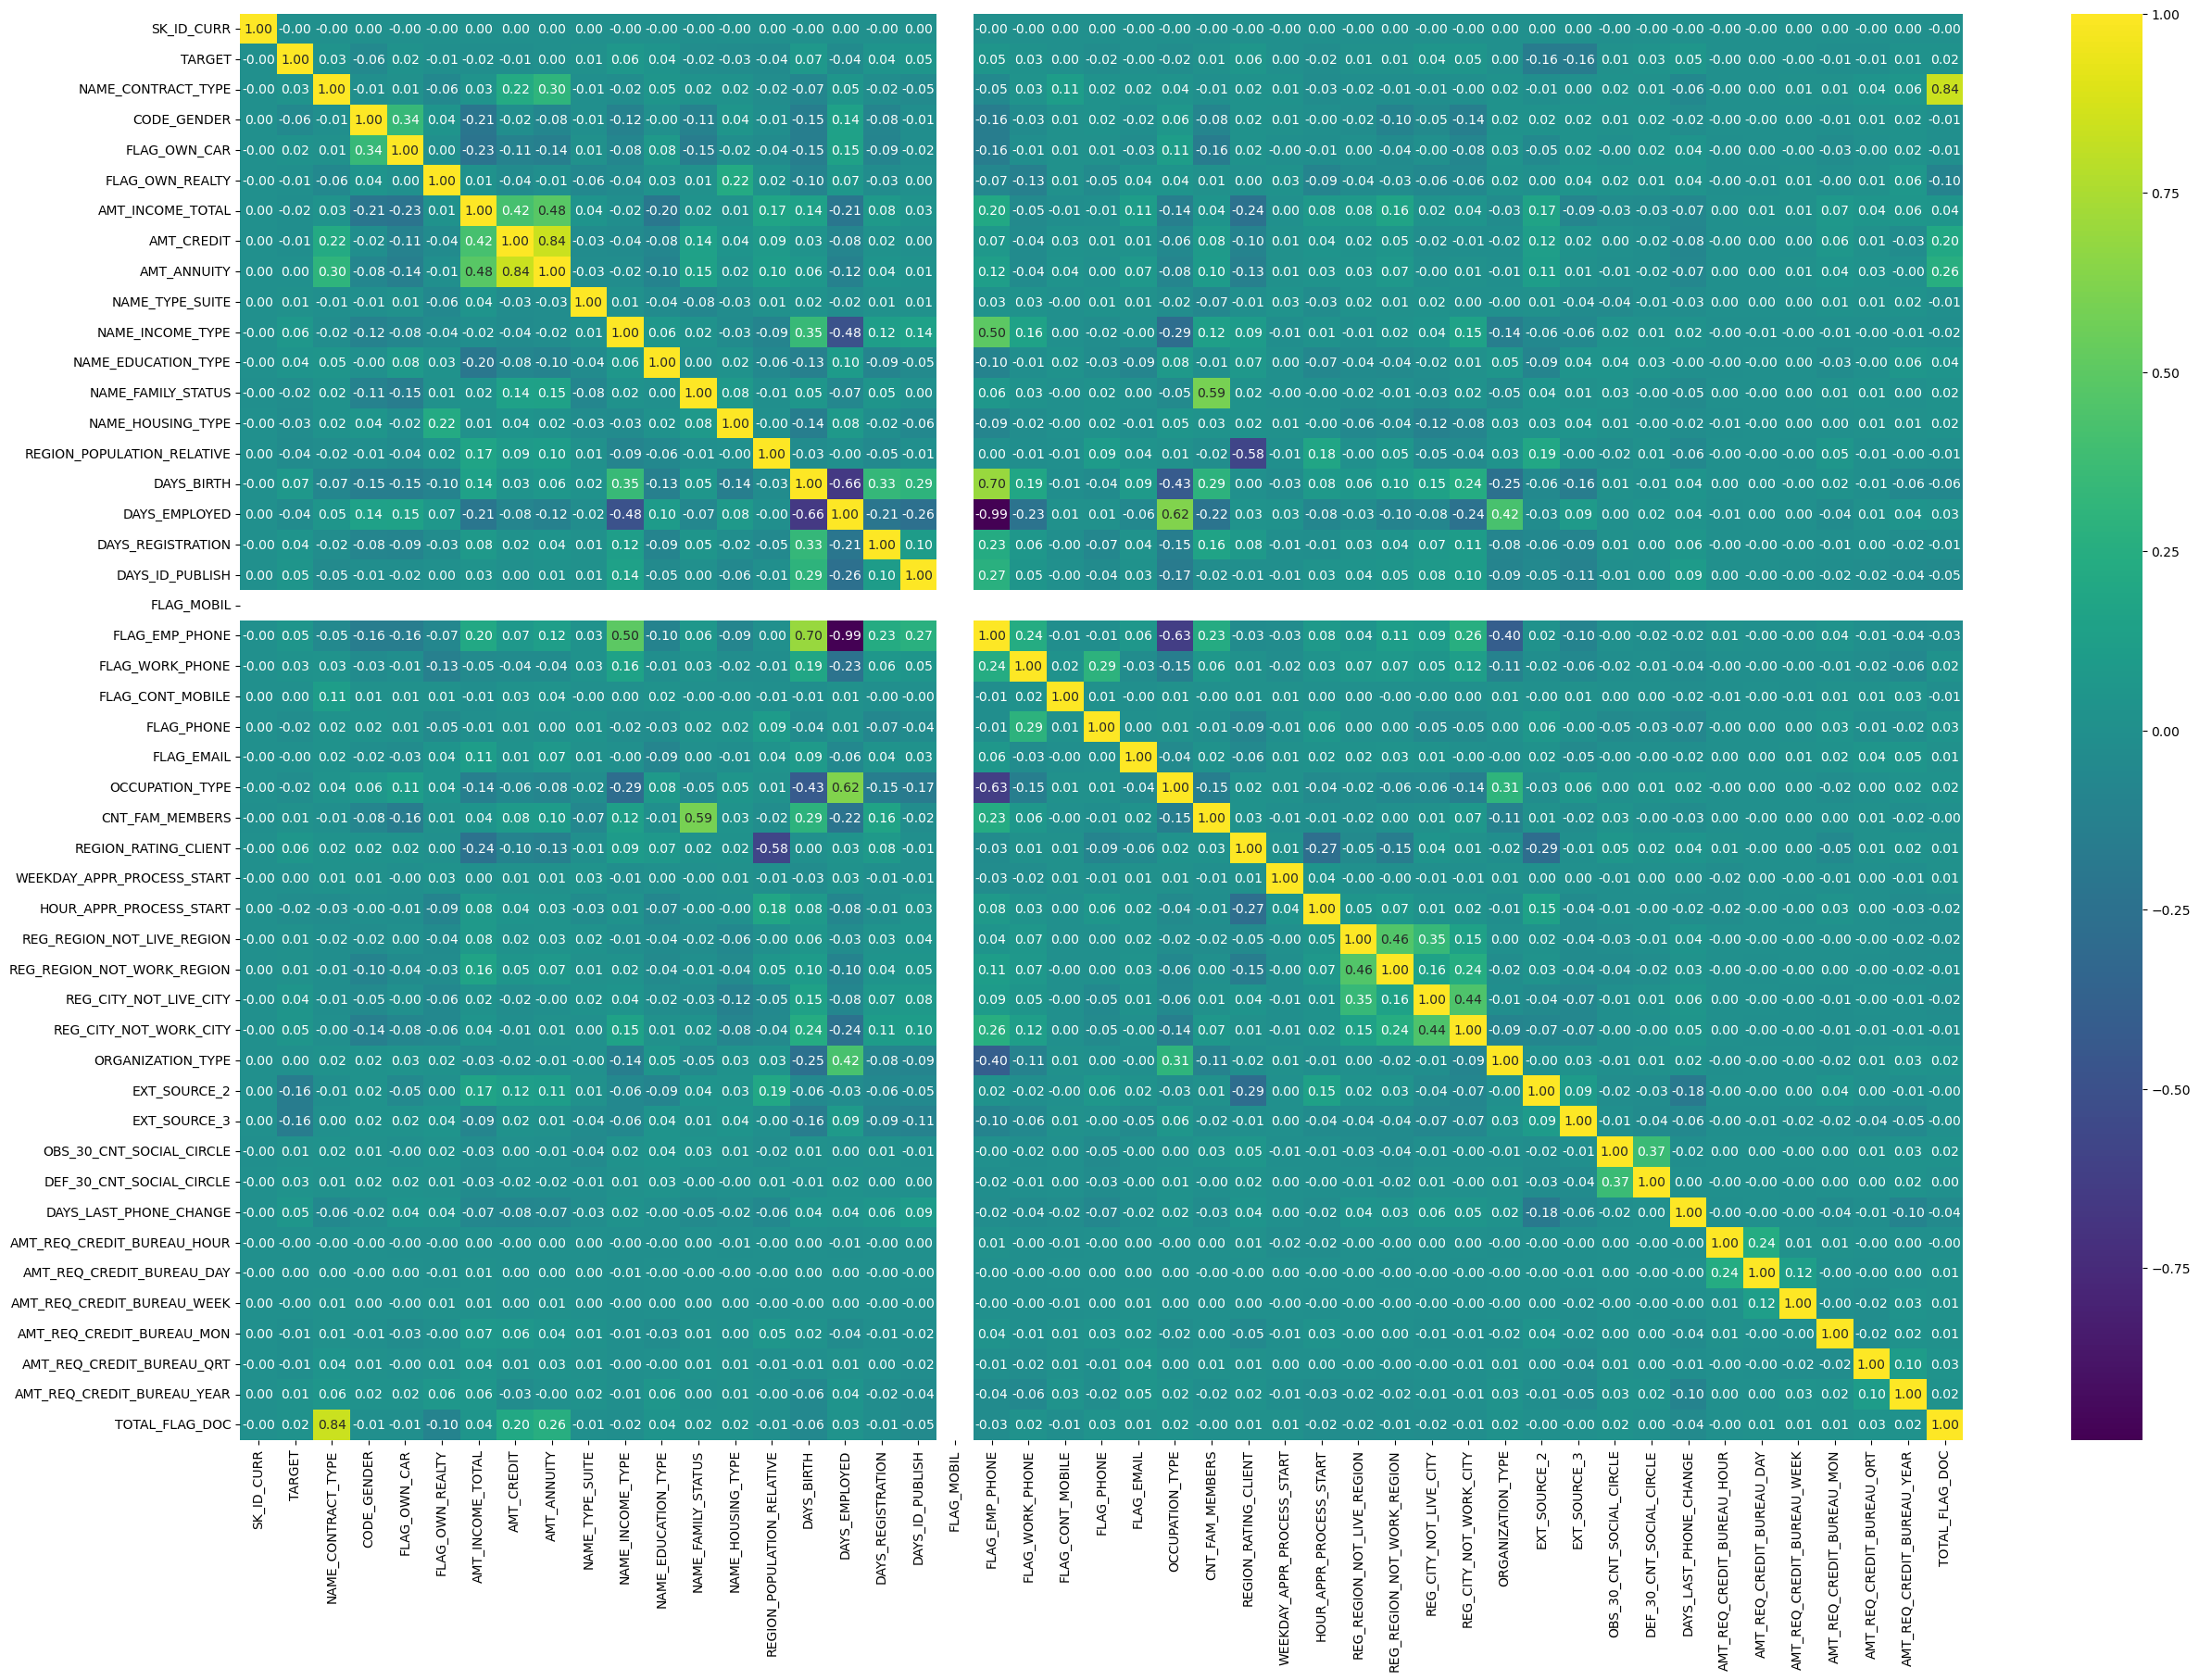

In [79]:
plt.figure(figsize=(30, 20))
sns.heatmap(application.corr(), cmap='viridis', annot=True, fmt='.2f')

Menghapus kolom yang memiliki korelasi lebih atau sama dengan 0.8 karena dianggap redundan  
selain redundan, kolom kolom tersebut dapat mengurangi dimensi

In [80]:
kolom_dihapus = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'NAME_CONTRACT_TYPE']

application.drop(columns=kolom_dihapus, inplace=True)

## SCALING

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
# Pilih kolom boolean, SK_ID_CURR, dan TARGET untuk dikecualikan
excluded_columns = ['SK_ID_CURR', 'TARGET']
boolean_columns = application.select_dtypes(include=['bool']).columns

# Pilih semua kolom numerik kecuali yang dikecualikan
numeric_cols = application.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.difference(excluded_columns + list(boolean_columns))

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan MinMaxScaler pada kolom yang dipilih
application[numeric_cols] = scaler.fit_transform(application[numeric_cols])

In [83]:
application.head()

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001     NaN         1.00          1.00             1.00   
1      100005     NaN         0.52          1.00             1.00   
3      100028     NaN         1.00          1.00             1.00   
4      100038     NaN         0.52          0.00             0.00   
5      100042     NaN         1.00          0.00             1.00   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0              0.20        0.56         0.50             1.00   
1              0.16        0.36         0.47             1.00   
3              0.30        0.79         0.67             1.00   
4              0.23        0.58         0.59             1.00   
5              0.28        0.68         0.60             1.00   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0              1.00                 0.34                1.00   
1              1.00                 1.00                1.00   
3              1.00                 1.00                1.00   
4              1.00                 1.00                1.00   
5              0.14                 1.00                1.00   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0               1.00                        0.26        0.89           0.75   
1               1.00                        0.50        0.91           0.74   
3               1.00                        0.37        0.95           0.75   
4               1.00                        0.14        0.96           0.75   
5               1.00                        0.35        0.90           0.68   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0               0.98             0.99             0.00              1.00   
1               0.95             0.97             0.00              1.00   
3               0.99             0.90             0.00              1.00   
4               0.98             0.90             1.00              1.00   
5               0.97             0.96             0.00              1.00   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0        0.00        1.00             1.00             0.17   
1        0.00        0.00             0.02             0.17   
3        1.00        0.00             0.33             0.38   
4        0.00        0.00             1.00             0.29   
5        1.00        0.00             0.19             0.17   

   REGION_RATING_CLIENT  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  0.58                        1.00                     0.93   
1                  0.58                        0.87                     0.72   
3                  0.58                        0.93                     0.78   
4                  0.58                        0.87                     0.56   
5                  0.58                        0.88                     0.87   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                        0.00                        0.00   
1                        0.00                        0.00   
3                        0.00                        0.00   
4                        0.00                        0.00   
5                        0.00                        0.00   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                    0.00                    0.00               0.10   
1                    0.00                    0.00               0.56   
3                    0.00                    0.00               1.00   
4                    0.00                    1.00               1.00   
5                    0.00                    0.00               0.15   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0          0.94          0.23                      0.00   
1          0.41          0.56                      0.00   
3          0.67          0.75              

# JOIN DATASET

In [84]:
join_bureau = pd.read_csv('join_bureau.csv')
join_previous = pd.read_csv('join_previous.csv')

In [85]:
# Lakukan left join antara application dan join_bureau
join_application = pd.merge(application, join_bureau, on='SK_ID_CURR', how='left')

# Lakukan left join hasil sebelumnya dengan join_previous
join_application = pd.merge(join_application, join_previous, on='SK_ID_CURR', how='left')

In [86]:
join_application.head()

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001     NaN         1.00          1.00             1.00   
1      100005     NaN         0.52          1.00             1.00   
2      100028     NaN         1.00          1.00             1.00   
3      100038     NaN         0.52          0.00             0.00   
4      100042     NaN         1.00          0.00             1.00   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  NAME_TYPE_SUITE  \
0              0.20        0.56           0.50             1.00   
1              0.16        0.36           0.47             1.00   
2              0.30        0.79           0.67             1.00   
3              0.23        0.58           0.59             1.00   
4              0.28        0.68           0.60             1.00   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0              1.00                 0.34                1.00   
1              1.00                 1.00                1.00   
2              1.00                 1.00                1.00   
3              1.00                 1.00                1.00   
4              0.14                 1.00                1.00   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0               1.00                        0.26        0.89           0.75   
1               1.00                        0.50        0.91           0.74   
2               1.00                        0.37        0.95           0.75   
3               1.00                        0.14        0.96           0.75   
4               1.00                        0.35        0.90           0.68   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0               0.98             0.99             0.00              1.00   
1               0.95             0.97             0.00              1.00   
2               0.99             0.90             0.00              1.00   
3               0.98             0.90             1.00              1.00   
4               0.97             0.96             0.00              1.00   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0        0.00        1.00             1.00             0.17   
1        0.00        0.00             0.02             0.17   
2        1.00        0.00             0.33             0.38   
3        0.00        0.00             1.00             0.29   
4        1.00        0.00             0.19             0.17   

   REGION_RATING_CLIENT  WEEKDAY_APPR_PROCESS_START_x  \
0                  0.58                          1.00   
1                  0.58                          0.87   
2                  0.58                          0.93   
3                  0.58                          0.87   
4                  0.58                          0.88   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                       0.93                        0.00   
1                       0.72                        0.00   
2                       0.78                        0.00   
3                       0.56                        0.00   
4                       0.87                        0.00   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                        0.00                    0.00                    0.00   
1                        0.00                    0.00                    0.00   
2                        0.00                    0.00                    0.00   
3                        0.00                    0.00                    1.00   
4                        0.00                    0.00                    0.00   

   ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0               0.10          0.94          0.23                      0.00   
1               0.56          0.41          0.56                      0.00   
2               1.00          0.67          0.75                

## MEMBUAT ULANG DATASET TRAIN DAN TEST

In [87]:
# Membagi dataset menjadi join_application_train (TARGET tidak NaN) dan join_application_test (TARGET NaN)
join_application_train = join_application[join_application['TARGET'].notna()]
join_application_test = join_application[join_application['TARGET'].isna()]

In [88]:
join_application_train.head()

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
47772      100002    1.00         0.52          1.00             1.00   
47773      100003    0.00         1.00          1.00             0.00   
47774      100004    0.00         0.52          0.00             1.00   
47775      100006    0.00         1.00          1.00             1.00   
47776      100007    0.00         0.52          1.00             1.00   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  NAME_TYPE_SUITE  \
47772              0.25        0.49           0.54             1.00   
47773              0.28        0.75           0.61             0.16   
47774              0.11        0.24           0.28             1.00   
47775              0.20        0.43           0.57             1.00   
47776              0.18        0.54           0.51             1.00   

       NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
47772              1.00                 1.00                0.16   
47773              0.14                 0.34                1.00   
47774              1.00                 1.00                0.16   
47775              1.00                 1.00                0.07   
47776              1.00                 1.00                0.16   

       NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47772               1.00                        0.26        0.99   
47773               1.00                        0.05        0.92   
47774               1.00                        0.14        0.89   
47775               1.00                        0.11        0.89   
47776               1.00                        0.40        0.88   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_WORK_PHONE  \
47772           0.76               0.98             0.96             0.00   
47773           0.76               1.00             1.00             0.00   
47774           0.76               0.98             0.95             1.00   
47775           0.75               0.95             0.95             0.00   
47776           0.75               0.98             0.93             0.00   

       FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
47772              1.00        1.00        0.00             0.57   
47773              1.00        1.00        0.00             0.28   
47774              1.00        1.00        0.00             0.57   
47775              1.00        0.00        0.00             0.57   
47776              1.00        0.00        0.00             0.28   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  WEEKDAY_APPR_PROCESS_START_x  \
47772             0.00                  0.58                          0.93   
47773             0.17                  0.00                          0.88   
47774             0.00                  0.58                          0.88   
47775             0.17                  0.58                          0.93   
47776             0.00                  0.58                          0.90   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
47772                       0.75                        0.00   
47773                       0.78                        0.00   
47774                       0.72                        0.00   
47775                       0.91                        0.00   
47776                       0.78                        0.00   

       REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
47772                        0.00                    0.00   
47773                        0.00                    0.00   
47774                        0.00                    0.00   
47775                        0.00                    0.00   
47776                        0.00                    0.00   

       REG_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
47772                    0.00               1.00          0.38          0.20   
47773                    0.00               0.13          0.78        

In [89]:
join_application_test.head()

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001     NaN         1.00          1.00             1.00   
1      100005     NaN         0.52          1.00             1.00   
2      100028     NaN         1.00          1.00             1.00   
3      100038     NaN         0.52          0.00             0.00   
4      100042     NaN         1.00          0.00             1.00   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  NAME_TYPE_SUITE  \
0              0.20        0.56           0.50             1.00   
1              0.16        0.36           0.47             1.00   
2              0.30        0.79           0.67             1.00   
3              0.23        0.58           0.59             1.00   
4              0.28        0.68           0.60             1.00   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0              1.00                 0.34                1.00   
1              1.00                 1.00                1.00   
2              1.00                 1.00                1.00   
3              1.00                 1.00                1.00   
4              0.14                 1.00                1.00   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0               1.00                        0.26        0.89           0.75   
1               1.00                        0.50        0.91           0.74   
2               1.00                        0.37        0.95           0.75   
3               1.00                        0.14        0.96           0.75   
4               1.00                        0.35        0.90           0.68   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0               0.98             0.99             0.00              1.00   
1               0.95             0.97             0.00              1.00   
2               0.99             0.90             0.00              1.00   
3               0.98             0.90             1.00              1.00   
4               0.97             0.96             0.00              1.00   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0        0.00        1.00             1.00             0.17   
1        0.00        0.00             0.02             0.17   
2        1.00        0.00             0.33             0.38   
3        0.00        0.00             1.00             0.29   
4        1.00        0.00             0.19             0.17   

   REGION_RATING_CLIENT  WEEKDAY_APPR_PROCESS_START_x  \
0                  0.58                          1.00   
1                  0.58                          0.87   
2                  0.58                          0.93   
3                  0.58                          0.87   
4                  0.58                          0.88   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                       0.93                        0.00   
1                       0.72                        0.00   
2                       0.78                        0.00   
3                       0.56                        0.00   
4                       0.87                        0.00   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                        0.00                    0.00                    0.00   
1                        0.00                    0.00                    0.00   
2                        0.00                    0.00                    0.00   
3                        0.00                    0.00                    1.00   
4                        0.00                    0.00                    0.00   

   ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0               0.10          0.94          0.23                      0.00   
1               0.56          0.41          0.56                      0.00   
2               1.00          0.67          0.75                

# JOIN APPLICATION TRAIN DATASET

Pembuatan dan pelatihan model berfokus hanya pada datset join_application_train

## MEMISAHKAN TRAIN DAN TEST SET

In [90]:
# Ganti nilai NaN dengan 0 untuk menandakan ketiadaan data
join_application_train.fillna(0, inplace=True)

C:\Users\sanny\AppData\Local\Temp\ipykernel_3936\1479866918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_application_train.fillna(0, inplace=True)


untuk nilai NaN digantikan dengan 0 yang menunjukan bahwa baris tersebut tidak ada riwayat sama sekali pada kolom tersebut

In [91]:
# Kolom ini dihapus karena tidak akan digunakan kembali
join_application_train = join_application_train.drop(columns=['SK_ID_CURR'])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = join_application_train.drop('TARGET', axis=1)  # Fitur (input)
y = join_application_train['TARGET']  # Target (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Cek jumlah data di setiap variabel
print("Jumlah X_train:", len(X_train))
print("Jumlah y_train:", len(y_train))
print("Jumlah X_test:", len(X_test))
print("Jumlah y_test:", len(y_test))

Jumlah X_train: 243624
Jumlah y_train: 243624
Jumlah X_test: 60907
Jumlah y_test: 60907


## CECK DAN HANDLING IMBALANCED CLASS

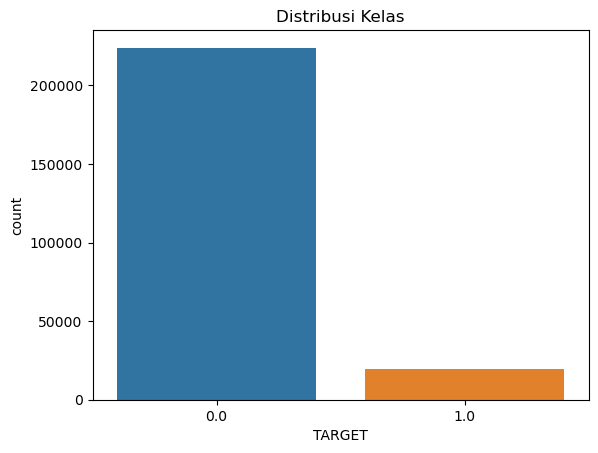

In [95]:
# Visualisasi dengan bar plot
sns.countplot(x=y_train, data=join_application_train)
plt.title('Distribusi Kelas')
plt.show()

In [96]:
from imblearn.over_sampling import SMOTE

# Menginisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada train set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

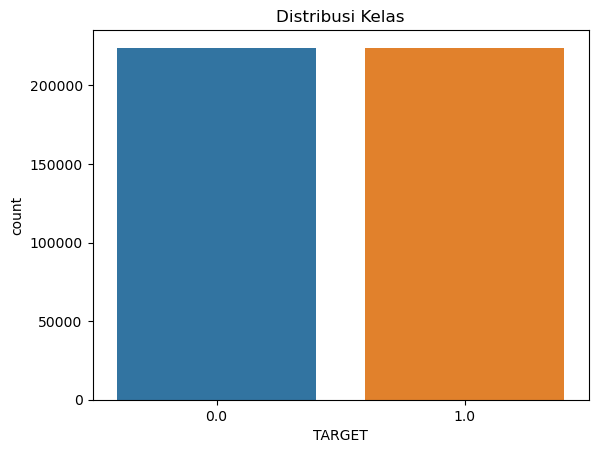

In [97]:
# Visualisasi dengan bar plot
sns.countplot(x=y_train_resampled, data=join_application_train)
plt.title('Distribusi Kelas')
plt.show()

## MODELING

### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [99]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression(random_state=42)

# Melatih model dengan data pelatihan
logreg.fit(X_train_resampled, y_train_resampled)

C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [100]:
# Melakukan prediksi pada data pengujian
y_pred = logreg.predict(X_test)

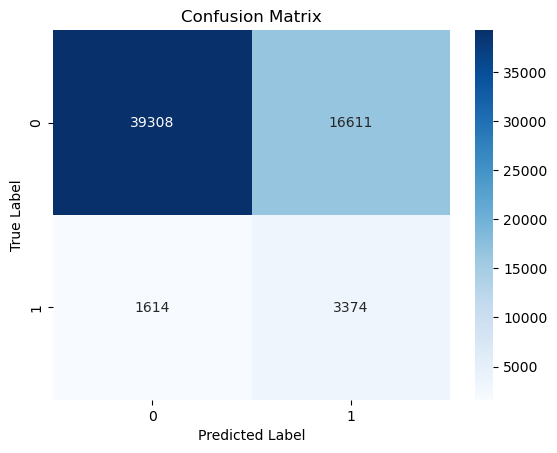

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     55919
         1.0       0.17      0.68      0.27      4988

    accuracy                           0.70     60907
   macro avg       0.56      0.69      0.54     60907
weighted avg       0.90      0.70      0.77     60907

Accuracy: 0.7008
ROC-AUC Score: 0.7515


In [101]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

Precision penting jika kamu ingin meminimalkan risiko menyetujui pinjaman untuk orang yang tidak layak.  
Recall penting jika kamu ingin memastikan semua orang yang layak menerima pinjaman, meskipun ada beberapa yang tidak layak yang ikut lolos.  
F1-Score berguna jika kamu ingin menyeimbangkan antara precision dan recall, terutama jika kedua kesalahan memiliki konsekuensi serius.

### Penyesuaian Logistic Regression

In [102]:
# Mendapatkan probabilitas prediksi untuk kelas 1
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Mengatur threshold, misal menjadi 0.4
threshold = 0.4
y_pred_new = (y_pred_proba >= threshold).astype(int)

# Evaluasi recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_new)
print(f"Recall: {recall}")

Recall: 0.7929029671210907


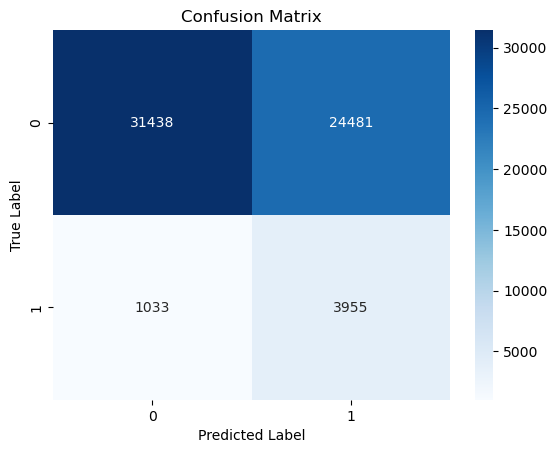

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71     55919
         1.0       0.14      0.79      0.24      4988

    accuracy                           0.58     60907
   macro avg       0.55      0.68      0.47     60907
weighted avg       0.90      0.58      0.67     60907



In [103]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_new)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_new))

## XGBoost

In [106]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [115]:
# Inisialisasi model XGBoost untuk klasifikasi
model_xgb = xgb.XGBClassifier(
    n_estimators=100,         # Jumlah pohon
    learning_rate=0.1,        # Learning rate (default 0.1)
    max_depth=6,              # Kedalaman pohon
    random_state=42           # Agar hasilnya bisa direproduksi
)

# Latih model pada data training
model_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
# Prediksi pada data testing
y_pred = model_xgb.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

Akurasi: 0.9182


In [117]:
# Mendapatkan probabilitas prediksi
y_pred_proba = model_xgb.predict_proba(X_test)

In [118]:
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

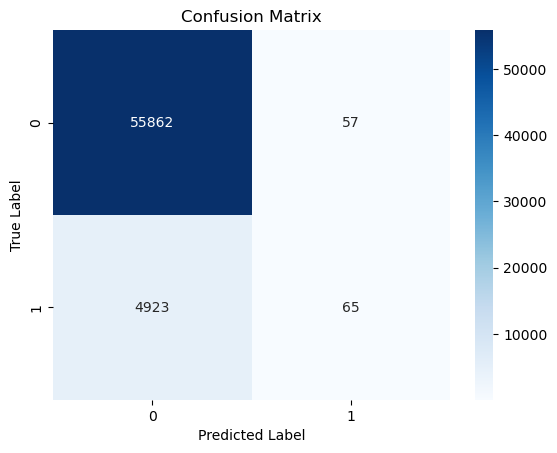

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     55919
         1.0       0.53      0.01      0.03      4988

    accuracy                           0.92     60907
   macro avg       0.73      0.51      0.49     60907
weighted avg       0.89      0.92      0.88     60907



In [119]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

interpretasi dari precision kelas 0 bernilai 0.92 dan kelas 1 bernilai 0.57, recall kelas 0 bernilai 1.00 dan kelas 1 bernilai 0.03, dan f1-score untuk kelas 0 bernilai 0.96 dan kelas 1 bernilai 0.05

## FEATURE IMPORTANCE

### Logistic Regression

In [124]:
# Melihat koeficient
coefficients = logreg.coef_[0]

# Menggabungkan koefisien dengan nama fitur
feature_importance = pd.Series(coefficients, index=X_train_resampled.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

DAYS_BIRTH                       2.76
AMT_ANNUITY_x                    2.23
FREQ_PREVIOUS_APP                2.09
SK_DPD_DEF_x                     2.06
AMT_BALANCE                      1.84
CNT_INSTALMENT                   1.80
AMT_DRAWINGS_ATM_CURRENT         1.58
NAME_CONTRACT_STATUS             1.56
NFLAG_LAST_APPL_IN_DAY           1.44
CNT_PAYMENT                      1.42
DAYS_EMPLOYED                    1.19
NAME_YIELD_GROUP                 0.96
DEF_30_CNT_SOCIAL_CIRCLE         0.83
SK_DPD_x                         0.78
TOTAL_FLAG_DOC                   0.73
NAME_EDUCATION_TYPE              0.64
AMT_CREDIT_SUM_OVERDUE           0.63
DAYS_ID_PUBLISH                  0.62
DAYS_DECISION                    0.58
DAYS_CREDIT                      0.51
DAYS_LAST_PHONE_CHANGE           0.44
NAME_INCOME_TYPE                 0.43
CREDIT_TYPE_ENCODE               0.43
WEEKDAY_APPR_PROCESS_START_x     0.39
NAME_GOODS_CATEGORY              0.38
REGION_RATING_CLIENT             0.35
WEEKDAY_APPR

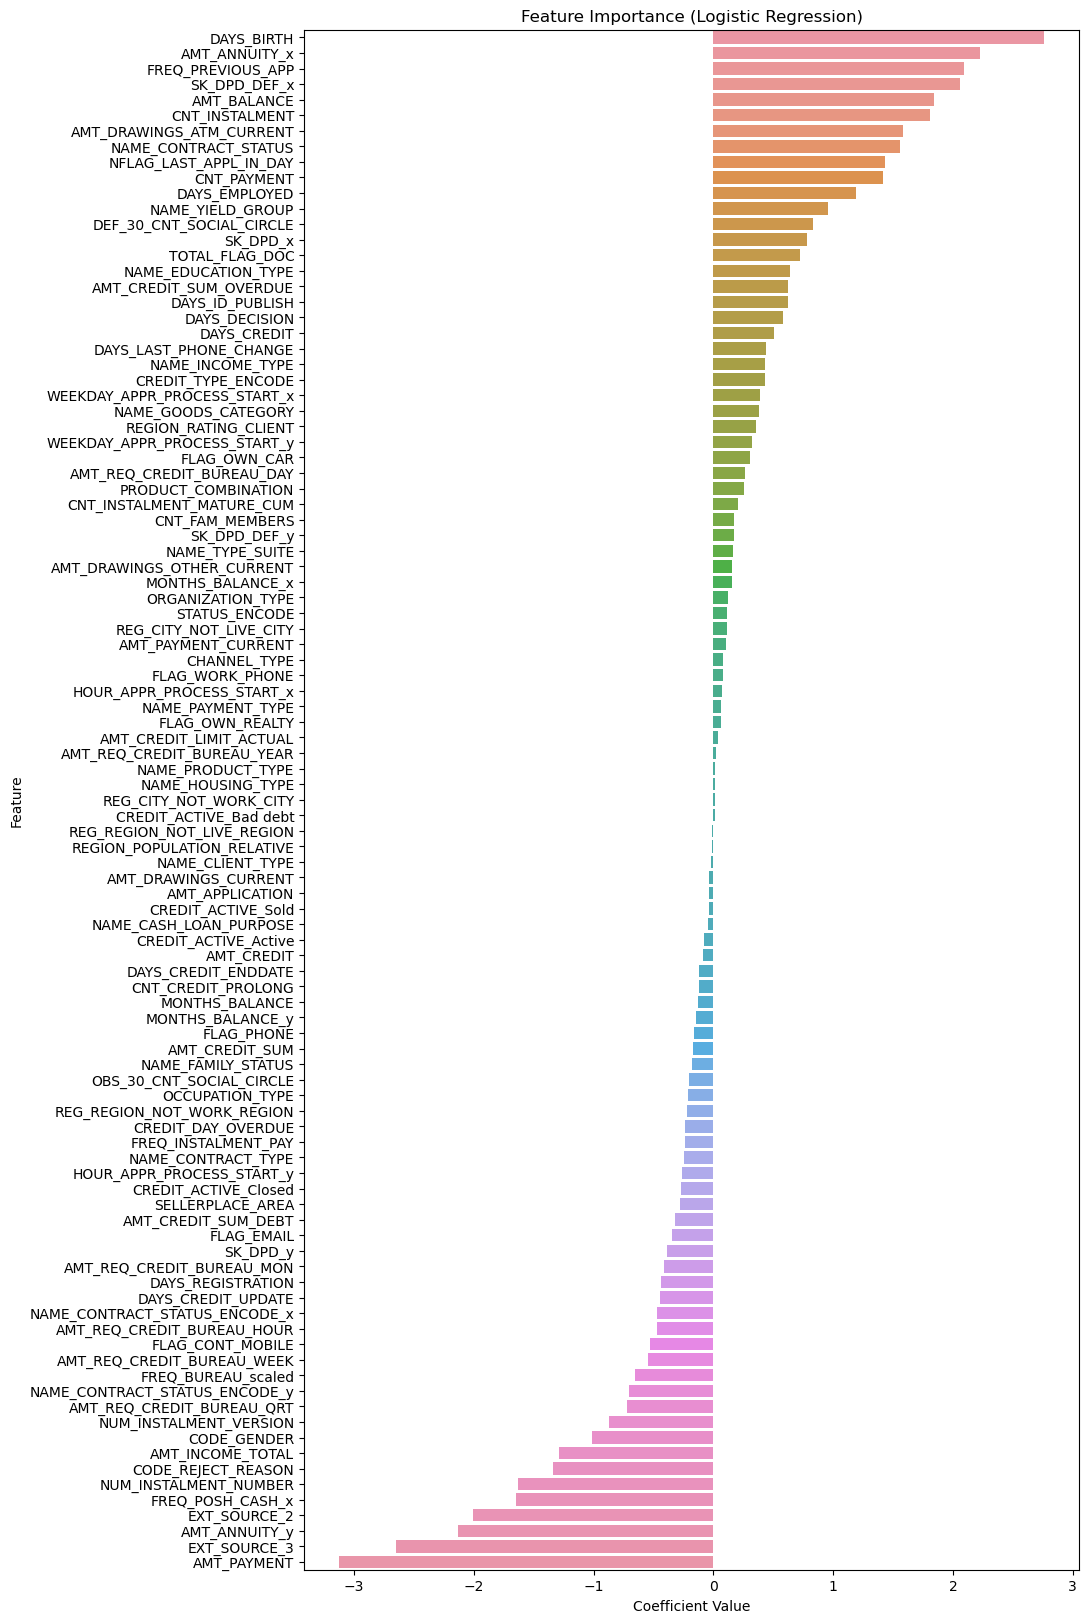

In [128]:
# Membuat visualisasi
plt.figure(figsize=(10, 20))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### XGBoost